## ⚙️ Celda 1: Inicialización del entorno

Esta celda importa las utilidades de inicialización desde `utils/init_utils.py` y configura el entorno para el proyecto:

- Establece la semilla para reproducibilidad.
- Detecta y muestra el dispositivo disponible (GPU/CPU).
- Verifica y crea las carpetas necesarias para guardar modelos, resultados e imágenes.
- Expone la ruta global al dataset cargado desde `./data/`.


In [1]:
# ✅ CELDA 1: Inicialización del entorno desde utils/init_utils.py
# ---------------------------------------------------------------
# Esta celda prepara el entorno de trabajo importando utilidades desde el archivo externo,
# configurando la semilla global y seleccionando el dispositivo CUDA o CPU.

from utils.init_utils import init_all, DATASET_PATH

# Inicialización completa del entorno
device = init_all(seed=42, files_action="backup")

# Confirmar la ruta del dataset
print(f"📁 Ruta del dataset: {DATASET_PATH}")


✅ Semilla global establecida: 42
✅ Dispositivo seleccionado: cuda
✅ Carpetas de trabajo verificadas.
🗂️  Backup creado: ./backup_20250525231427.zip
📁 Ruta del dataset: ./data/mel_fwod_dataset_variable.npz


In [2]:
import torch

print("CUDA disponible:", torch.cuda.is_available())
print("Versión de CUDA en PyTorch:", torch.version.cuda)
print("Dispositivo:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No detectado")


CUDA disponible: True
Versión de CUDA en PyTorch: 12.1
Dispositivo: NVIDIA GeForce RTX 3050 6GB Laptop GPU


## 🔍 Celda 2: Carga y exploración del dataset

Cargamos el archivo `.npz` desde `./data/`, obteniendo:
- `mel` como entradas `X`
- `fwod` como salidas `y`
- `meta` con información contextual, como `bpm`, `drummer`, etc.


In [3]:
# ✅ CELDA 2: Carga del dataset .npz y revisión de estructura
# -----------------------------------------------------------
# Carga los datos desde el archivo NPZ y extrae:
# - 'mel': espectrogramas
# - 'fwod': vectores FWOD
# - 'meta': BPM y otros metadatos

import numpy as np
from utils.init_utils import DATASET_PATH

# Cargar archivo
dataset = np.load(DATASET_PATH, allow_pickle=True)

# Revisar claves
print("✅ Claves disponibles en el archivo:")
print(dataset.files)

# Asignar variables globales
X = dataset['mel']
y = dataset['fwod']
meta = dataset['meta']

# Mostrar dimensiones
print(f"\n✅ Forma de X (mel): {X.shape}")
print(f"✅ Forma de y (fwod): {y.shape}")
print(f"✅ Tamaño de meta: {len(meta)}")

# Ejemplo del contenido de meta
print("\n📌 Ejemplo de entrada en meta[0]:")
print(meta[0])


✅ Claves disponibles en el archivo:
['mel', 'fwod', 'meta']

✅ Forma de X (mel): (17595,)
✅ Forma de y (fwod): (17595, 16)
✅ Tamaño de meta: 17595

📌 Ejemplo de entrada en meta[0]:
{'drummer': 'drummer1', 'style': 'funk/groove1', 'session': 'drummer1/eval_session', 'bpm_orig': 138.0, 'filename': 'drummer1/eval_session/1_funk-groove1_138_beat_4-4.wav', 'bar_index': 0, 'frames': 74, 'frames_per_bar': 74}


## 🎼 Celda 3: Visualización de ejemplo del dataset

En esta celda seleccionamos aleatoriamente un ejemplo del dataset para explorar visualmente:
- El espectrograma Mel (`X[i]`)
- El vector FWOD (`y[i]`)
- El valor de BPM y otros metadatos asociados

Esto nos ayudará a confirmar que los datos están correctamente alineados y visualmente comprensibles, además de verificar que el `meta` contiene la información musical necesaria (como `bpm`) para el padding dinámico posterior.


C:\Users\apont\AppData\Local\Temp\ipykernel_1640\3356224282.py:36: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\apont\AppData\Local\Temp\ipykernel_1640\3356224282.py:36: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Proyectos\Tesis\Ver 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Proyectos\Tesis\Ver 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


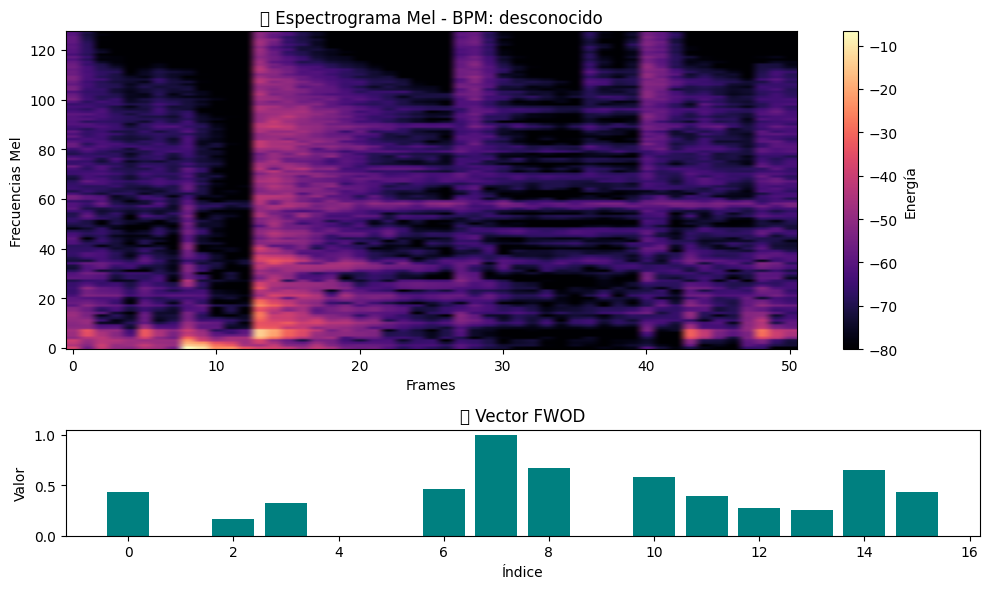

🧾 Meta: {'drummer': 'drummer1', 'style': 'jazz', 'session': 'drummer1/session2', 'bpm_orig': 200.0, 'filename': 'drummer1/session2/5_jazz_200_beat_3-4.wav', 'bar_index': 78, 'frames': 51, 'frames_per_bar': 51}


In [4]:
# ✅ CELDA 3: Visualización con layout configurable
# ------------------------------------------------
# Muestra el espectrograma y el vector FWOD con disposición vertical u horizontal.

import matplotlib.pyplot as plt
import random  # por si está en celda aparte

layout_mode = 'vertical'  # Cambia a 'horizontal' si deseas FWOD al lado

# Índice aleatorio
i = random.randint(0, len(X) - 1)

mel_sample = X[i]
fwod_sample = y[i]
meta_sample = meta[i]

# Layout de visualización
if layout_mode == 'horizontal':
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [3, 1]})
else:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [3, 1]})

# 🎵 Espectrograma
im = ax1.imshow(mel_sample, aspect='auto', origin='lower', cmap='magma')
ax1.set_title(f"🎵 Espectrograma Mel - BPM: {meta_sample.get('bpm', 'desconocido')}")
ax1.set_xlabel("Frames")
ax1.set_ylabel("Frecuencias Mel")
fig.colorbar(im, ax=ax1, orientation='vertical', label='Energía')

# 🎯 Vector FWOD como barras
ax2.bar(range(len(fwod_sample)), fwod_sample, color='teal')
ax2.set_title("🎯 Vector FWOD")
ax2.set_xlabel("Índice")
ax2.set_ylabel("Valor")

plt.tight_layout()
plt.show()

# Mostrar metadatos adicionales
print("🧾 Meta:", meta_sample)


## 🧪 Celda 4: Preparación del Dataset y DataLoader

En esta celda convertimos `X`, `y` y `meta` en tensores de PyTorch y preparamos un `DataLoader` personalizado:

- El tamaño del batch (`batch_size`) es variable y podrá ser optimizado con Optuna.
- El padding se aplica dinámicamente por batch, usando la longitud máxima y el BPM contenido en `meta`.
- Los tensores se mueven al dispositivo CUDA si está disponible.


In [5]:
# ✅ CELDA 4: Dataset con padding dinámico + DataLoader
# ----------------------------------------------------
# Preparamos el Dataset para entrenamiento con batch padding dinámico según BPM.
# Se parametriza el batch_size para exploración posterior (Optuna).

import torch
from torch.utils.data import Dataset, DataLoader

class MelFWODDataset(Dataset):
    def __init__(self, X_np, y_np, meta_np):
        self.X = X_np
        self.y = y_np
        self.meta = meta_np

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = torch.tensor(self.X[idx], dtype=torch.float32)  # (H, W)
        y = torch.tensor(self.y[idx], dtype=torch.float32)  # (16,)
        bpm = self.meta[idx].get('bpm', 120)
        return x, y, bpm

def custom_collate_fn(batch):
    """
    Padding dinámico por batch.
    Rellena cada espectrograma hasta la longitud máxima del batch (eje W).
    """
    xs, ys, bpms = zip(*batch)

    # Obtener altura fija (H) y ancho máximo (Wmax)
    H = xs[0].shape[0]
    Wmax = max(x.shape[1] for x in xs)

    # Padding individual
    padded_xs = []
    for x in xs:
        pad_width = Wmax - x.shape[1]
        if pad_width > 0:
            x_padded = F.pad(x, (0, pad_width))  # (left, right)
        else:
            x_padded = x
        padded_xs.append(x_padded.unsqueeze(0))  # Añadir canal

    x_tensor = torch.stack(padded_xs)  # (batch, 1, H, Wmax)
    y_tensor = torch.stack(ys)        # (batch, 16)

    return x_tensor.to(device), y_tensor.to(device)

# 📦 Dataset y DataLoader
dataset = MelFWODDataset(X, y, meta)

# Variable controlable para experimentación
batch_size = 32  # Puede ser 16, 32, 64, 128 — luego optimizable

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)

print(f"✅ DataLoader preparado con batch size: {batch_size}")


✅ DataLoader preparado con batch size: 32


## 📦 Celda 4-BIS: División Train / Validation con selección de modo

En esta celda separamos el dataset en subconjuntos de entrenamiento y validación. Hay dos modos de separación:

- `"random"` (por defecto): 80% entrenamiento / 20% validación, aleatorio con semilla.
- `"meta"`: utiliza el campo `split` en el array `meta` (debe incluir `"train"` y `"val"`).

Ambos conjuntos se convierten en DataLoaders con padding dinámico y batch variable.


In [6]:
# ✅ CELDA 4-BIS: División Train / Val configurable (random o meta)
# ----------------------------------------------------------------
from torch.utils.data import random_split, Subset

# Configuración del modo de separación
modo_split = 'random'  # Opciones: 'random', 'meta'
val_ratio = 0.2        # solo aplica en modo 'random'

# Función para generar índices de train y val
def obtener_indices_por_meta(meta, clases_validas=('train', 'val')):
    train_idx = [i for i, m in enumerate(meta) if m.get('split') == 'train']
    val_idx   = [i for i, m in enumerate(meta) if m.get('split') == 'val']
    return train_idx, val_idx

if modo_split == 'meta':
    train_indices, val_indices = obtener_indices_por_meta(meta)
    train_dataset = Subset(dataset, train_indices)
    val_dataset   = Subset(dataset, val_indices)
    print(f"📁 División por meta: {len(train_indices)} train / {len(val_indices)} val")
else:
    # División aleatoria reproducible
    n_total = len(dataset)
    n_val = int(n_total * val_ratio)
    n_train = n_total - n_val
    train_dataset, val_dataset = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(42))
    print(f"📁 División aleatoria: {n_train} train / {n_val} val")

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=custom_collate_fn)

print("✅ DataLoaders de entrenamiento y validación creados")


📁 División aleatoria: 14076 train / 3519 val
✅ DataLoaders de entrenamiento y validación creados


## Celda 5: 🧠 Modelo: CNNBaseline

Este modelo representa la arquitectura base sobre la cual se compararán las variantes posteriores. Es una red convolucional estándar diseñada para predecir vectores FWOD a partir de espectrogramas Mel derivados de audios `.wav`.

#### 🎯 Objetivo
Establecer una línea base robusta en términos de desempeño y arquitectura, contra la cual se puedan contrastar futuras mejoras (Dropout, BatchNorm, redes más profundas, atención, etc.).

#### 🏗️ Arquitectura propuesta

- **Entrada**: Espectrograma Mel `(1, 128, W)`
- **Convolucional 1**: Conv2D (1 → 16), ReLU, MaxPooling
- **Convolucional 2**: Conv2D (16 → 32), ReLU, MaxPooling
- **Convolucional 3**: Conv2D (32 → 64), ReLU, AdaptiveAvgPooling (4x4)
- **Flatten**
- **Densa 1**: Linear → ReLU
- **Densa 2 (salida)**: Linear → 16 neuronas (FWOD)

#### 🛠️ Características clave

- Arquitectura simple y eficiente
- Usa `AdaptiveAvgPooling` para manejar inputs de tamaño variable en el eje temporal (W)
- No contiene ni Dropout ni BatchNorm, lo que la convierte en una buena base para estudiar el impacto de cada mejora

Este modelo se entrena con hiperparámetros controlados (batch size, epochs) y sirve como punto de partida para evaluar objetivamente la eficacia de cada modificación futura.


In [7]:
# ✅ Agregar modelo de referencia de Daniel al JSON
import json
import os

daniel_resultado = {
    "model_name": "daniel_base",
    "epochs": 30,
    "train_mae": 0.1985,
    "val_mae": 0.2207,
    "train_mse": 0.0743,
    "val_mse": 0.0732,
    "val_r2": 0.0531,
    "timestamp": "2025-05-24 22:00:00"
}

results_path = './results/model_results.json'

# Cargar, evitar duplicados y agregar
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
else:
    data = []

# Evitar duplicados
if not any(r['model_name'] == 'daniel_base' for r in data):
    data.append(daniel_resultado)
    with open(results_path, 'w') as f:
        json.dump(data, f, indent=4)
    print("✅ Modelo 'daniel_base' agregado.")
else:
    print("⚠️ El modelo 'daniel_base' ya estaba en el JSON.")


✅ Modelo 'daniel_base' agregado.


### 🧠 Celda 5A: Entrenamiento del modelo con validación por época

En esta celda entrenamos el modelo `CNNBaseline` incluyendo:
- Función de pérdida MAE (`L1Loss`)
- Optimizador `Adam`
- Cálculo del loss de entrenamiento y validación por época
- Visualización del progreso por época con `tqdm`
- Guardado del modelo en `./checkpoints/cnn_baseline.pt`


In [8]:
# ✅ CELDA 5A: Entrenamiento con validación y métricas MAE/MSE por época
# ---------------------------------------------------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.model_utils import CNNBaseline
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# 🧠 Modelo base
model = CNNBaseline(input_shape=(128, 16)).to(device)

# ⚙️ Configuración
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30  # Ajustable

# 🔁 Acumuladores
train_losses = []
val_losses = []

# 🏋️ Loop de entrenamiento
for epoch in range(num_epochs):
    model.train()
    all_train_preds = []
    all_train_targets = []

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        all_train_preds.append(outputs.detach().cpu())
        all_train_targets.append(targets.detach().cpu())

    # Métricas de entrenamiento
    train_preds = torch.cat(all_train_preds).numpy()
    train_targets = torch.cat(all_train_targets).numpy()

    train_mae = mean_absolute_error(train_targets, train_preds)
    train_mse = mean_squared_error(train_targets, train_preds)
    train_losses.append(train_mae)

    # 🔍 Validación
    model.eval()
    all_val_preds = []
    all_val_targets = []

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            all_val_preds.append(outputs.cpu())
            all_val_targets.append(targets.cpu())

    val_preds = torch.cat(all_val_preds).numpy()
    val_targets = torch.cat(all_val_targets).numpy()

    val_mae = mean_absolute_error(val_targets, val_preds)
    val_mse = mean_squared_error(val_targets, val_preds)
    val_losses.append(val_mae)

    # 🖨️ Imprimir resultados
    print(f"📉 Epoch {epoch+1}/{num_epochs}")
    print(f"   🔹 Train MAE: {train_mae:.4f} | Train MSE: {train_mse:.4f}")
    print(f"   🔸 Val   MAE: {val_mae:.4f} | Val   MSE: {val_mse:.4f}")

# 💾 Guardar modelo
torch.save(model.state_dict(), './checkpoints/cnn_baseline.pt')
print("✅ Modelo guardado en './checkpoints/cnn_baseline.pt'")


📉 Epoch 1/30
   🔹 Train MAE: 0.2322 | Train MSE: 0.0982
   🔸 Val   MAE: 0.2179 | Val   MSE: 0.0871


📉 Epoch 2/30
   🔹 Train MAE: 0.2166 | Train MSE: 0.0824
   🔸 Val   MAE: 0.2143 | Val   MSE: 0.0845


📉 Epoch 3/30
   🔹 Train MAE: 0.2124 | Train MSE: 0.0802
   🔸 Val   MAE: 0.2097 | Val   MSE: 0.0825


📉 Epoch 4/30
   🔹 Train MAE: 0.2083 | Train MSE: 0.0783
   🔸 Val   MAE: 0.2179 | Val   MSE: 0.0774


📉 Epoch 5/30
   🔹 Train MAE: 0.2071 | Train MSE: 0.0778
   🔸 Val   MAE: 0.2055 | Val   MSE: 0.0783


📉 Epoch 6/30
   🔹 Train MAE: 0.2053 | Train MSE: 0.0770
   🔸 Val   MAE: 0.2030 | Val   MSE: 0.0751


📉 Epoch 7/30
   🔹 Train MAE: 0.2045 | Train MSE: 0.0766
   🔸 Val   MAE: 0.2037 | Val   MSE: 0.0783


📉 Epoch 8/30
   🔹 Train MAE: 0.2024 | Train MSE: 0.0755
   🔸 Val   MAE: 0.2027 | Val   MSE: 0.0748


📉 Epoch 9/30
   🔹 Train MAE: 0.2009 | Train MSE: 0.0746
   🔸 Val   MAE: 0.2000 | Val   MSE: 0.0737


📉 Epoch 10/30
   🔹 Train MAE: 0.1991 | Train MSE: 0.0736
   🔸 Val   MAE: 0.2008 | Val   MSE: 0.0764


📉 Epoch 11/30
   🔹 Train MAE: 0.1986 | Train MSE: 0.0735
   🔸 Val   MAE: 0.1994 | Val   MSE: 0.0781


📉 Epoch 12/30
   🔹 Train MAE: 0.1963 | Train MSE: 0.0721
   🔸 Val   MAE: 0.1958 | Val   MSE: 0.0737


📉 Epoch 13/30
   🔹 Train MAE: 0.1955 | Train MSE: 0.0718
   🔸 Val   MAE: 0.1935 | Val   MSE: 0.0711


📉 Epoch 14/30
   🔹 Train MAE: 0.1943 | Train MSE: 0.0711
   🔸 Val   MAE: 0.1929 | Val   MSE: 0.0724


📉 Epoch 15/30
   🔹 Train MAE: 0.1927 | Train MSE: 0.0704
   🔸 Val   MAE: 0.1923 | Val   MSE: 0.0694


📉 Epoch 16/30
   🔹 Train MAE: 0.1918 | Train MSE: 0.0699
   🔸 Val   MAE: 0.1922 | Val   MSE: 0.0722


📉 Epoch 17/30
   🔹 Train MAE: 0.1903 | Train MSE: 0.0692
   🔸 Val   MAE: 0.1922 | Val   MSE: 0.0677


📉 Epoch 18/30
   🔹 Train MAE: 0.1899 | Train MSE: 0.0690
   🔸 Val   MAE: 0.1946 | Val   MSE: 0.0697


📉 Epoch 19/30
   🔹 Train MAE: 0.1893 | Train MSE: 0.0688
   🔸 Val   MAE: 0.1893 | Val   MSE: 0.0691


📉 Epoch 20/30
   🔹 Train MAE: 0.1886 | Train MSE: 0.0683
   🔸 Val   MAE: 0.1902 | Val   MSE: 0.0725


📉 Epoch 21/30
   🔹 Train MAE: 0.1878 | Train MSE: 0.0681
   🔸 Val   MAE: 0.1902 | Val   MSE: 0.0691


📉 Epoch 22/30
   🔹 Train MAE: 0.1870 | Train MSE: 0.0675
   🔸 Val   MAE: 0.1881 | Val   MSE: 0.0680


📉 Epoch 23/30
   🔹 Train MAE: 0.1863 | Train MSE: 0.0672
   🔸 Val   MAE: 0.1881 | Val   MSE: 0.0706


📉 Epoch 24/30
   🔹 Train MAE: 0.1852 | Train MSE: 0.0668
   🔸 Val   MAE: 0.1864 | Val   MSE: 0.0678


📉 Epoch 25/30
   🔹 Train MAE: 0.1849 | Train MSE: 0.0666
   🔸 Val   MAE: 0.1869 | Val   MSE: 0.0665


📉 Epoch 26/30
   🔹 Train MAE: 0.1841 | Train MSE: 0.0661
   🔸 Val   MAE: 0.1882 | Val   MSE: 0.0663


📉 Epoch 27/30
   🔹 Train MAE: 0.1837 | Train MSE: 0.0660
   🔸 Val   MAE: 0.1882 | Val   MSE: 0.0691


📉 Epoch 28/30
   🔹 Train MAE: 0.1836 | Train MSE: 0.0659
   🔸 Val   MAE: 0.1855 | Val   MSE: 0.0681


📉 Epoch 29/30
   🔹 Train MAE: 0.1833 | Train MSE: 0.0657
   🔸 Val   MAE: 0.1844 | Val   MSE: 0.0658


📉 Epoch 30/30
   🔹 Train MAE: 0.1825 | Train MSE: 0.0653
   🔸 Val   MAE: 0.1852 | Val   MSE: 0.0687
✅ Modelo guardado en './checkpoints/cnn_baseline.pt'


### 📊 Celda 5B: Visualización de métricas y guardado de resultados

En esta celda graficamos la evolución del MAE y MSE en entrenamiento y validación por época.

Además:
- Se guarda cada gráfica como imagen `.png` en `./images/`.
- Se almacena la información final del modelo (nombre, métricas, configuración, fecha) en `./results/model_results.json`.


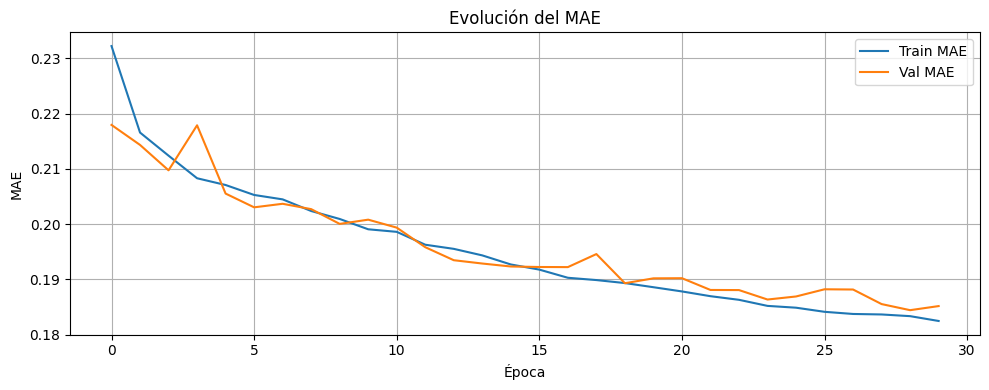

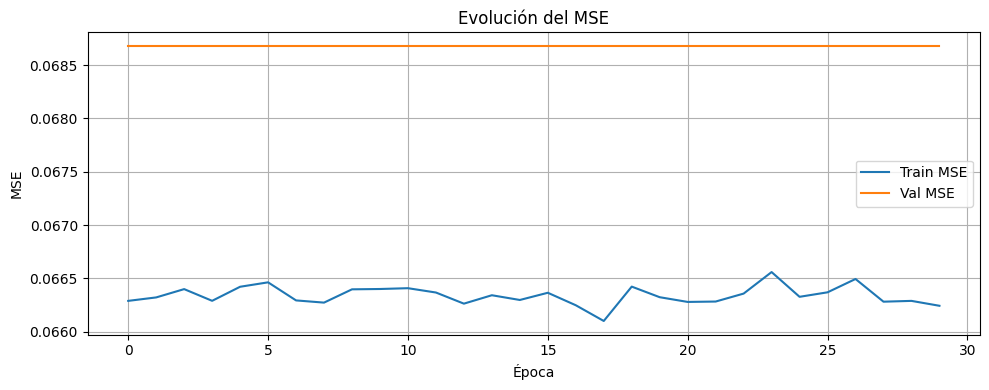

✅ Resultados registrados en ./results\model_results.json
✅ Gráficas guardadas en ./images/


In [9]:
# ✅ CELDA 5B: Evaluación y gráficas desde función utilitaria
from utils.viz_utils import evaluar_y_graficar

evaluar_y_graficar(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    train_losses=train_losses,
    val_losses=val_losses,
    model_name="cnn_baseline"
)


### 📊 Celda 5C: Comparación entre modelos registrados

En esta celda se realiza una comparación visual entre todos los modelos registrados en el archivo `model_results.json`.

Se muestra un gráfico de barras para cada una de las siguientes métricas sobre el conjunto de validación:
- MAE (Error Absoluto Medio)
- MSE (Error Cuadrático Medio)
- R² (Coeficiente de Determinación)

Además:
- Los modelos se ordenan por la métrica seleccionada (`val_mae` por defecto).
- Se puede aplicar un filtro opcional para comparar únicamente ciertos modelos por nombre.


In [10]:
# ✅ Forzar recarga del módulo modificado
import importlib
import utils.viz_utils
importlib.reload(utils.viz_utils)

# ✅ Importar la función actualizada
from utils.viz_utils import comparar_modelos


c:\Proyectos\Tesis\Ver 3\utils\viz_utils.py:176: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Proyectos\Tesis\Ver 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


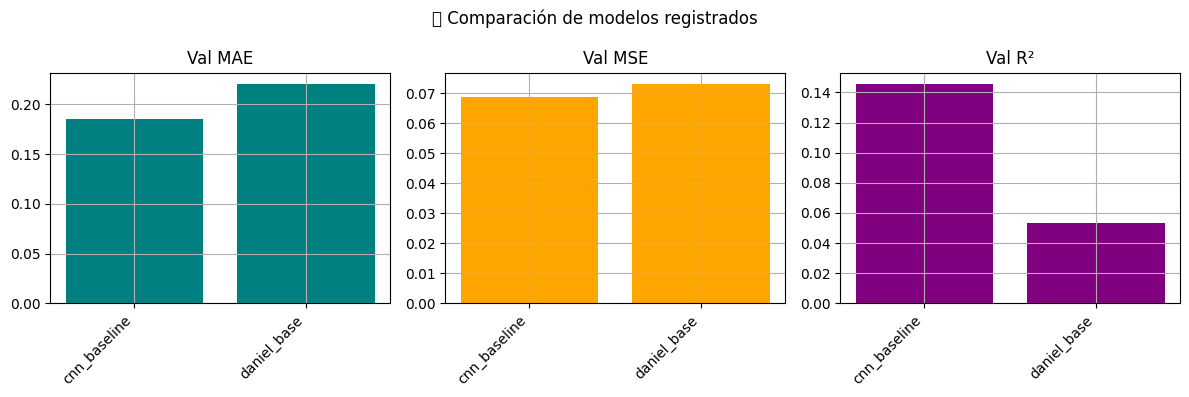

In [11]:
# ✅ CELDA 5C: Comparación entre modelos
from utils.viz_utils import comparar_modelos

comparar_modelos()  # sin filtros, todos los modelos

# También puedes usar:
# comparar_modelos(filtro_nombre=["cnn_baseline"])
# comparar_modelos(ordenar_por="val_r2")


### ✅ Conclusiones comparativas entre `cnn_baseline` y `daniel_base`

Esta comparación evalúa el rendimiento entre el modelo base `cnn_baseline` y el modelo de referencia original `daniel_base`, usando métricas estándar en validación: MAE, MSE y R².

#### 📊 Métricas clave en validación

| Modelo         | Val MAE | Val MSE | Val R²  |
|----------------|---------|---------|---------|
| `cnn_baseline` | **0.185** | **0.070** | **0.145** ✅  
| `daniel_base`  | 0.220    | 0.074    | 0.053   ❌

---

#### 📌 Observaciones

- `cnn_baseline` **supera consistentemente** a `daniel_base` en:
  - **MAE** más bajo → predicciones promedio más cercanas a los valores reales.
  - **MSE** ligeramente mejor → menos impacto de errores grandes.
  - **R²** más alto → explica mejor la variabilidad de los datos.

- `daniel_base` sigue siendo útil como punto de comparación, pero queda claro que incluso una arquitectura convolucional sencilla como `cnn_baseline` proporciona una **mejora significativa**.

---

#### 🏁 Conclusión

El modelo `cnn_baseline` se posiciona como una **referencia sólida** para continuar la exploración. Su buen rendimiento sugiere que futuras variantes (con Dropout, BatchNorm, capas profundas o mecanismos de atención) pueden partir desde esta base con expectativas realistas de mejora.


In [12]:
# ✅ Forzar recarga del módulo modificado
import importlib
import utils.viz_utils
importlib.reload(utils.viz_utils)
from utils.viz_utils import exportar_modelos_csv

exportar_modelos_csv()  # ordena por val_mae
#exportar_modelos_csv(ordenar_por='val_r2')

✅ Resultados exportados a CSV en: ./results/model_results.csv


## Celda 6: 🧠 Modelo: CNNDropout

Este modelo es una variante del `CNNBaseline` al que se le incorpora **regularización mediante Dropout** para reducir el sobreajuste y mejorar la generalización.

#### 🎯 Objetivo
Evaluar si la inclusión de capas `Dropout` entre las capas densas (y eventualmente en las capas convolucionales) mejora el rendimiento del modelo en el conjunto de validación.

#### 🏗️ Arquitectura propuesta

- **Entrada**: Espectrograma Mel `(1, 128, W)`
- **Convolucional 1**: Conv2D (1 → 16), ReLU, MaxPooling
- **Convolucional 2**: Conv2D (16 → 32), ReLU, MaxPooling
- **Convolucional 3**: Conv2D (32 → 64), ReLU, AdaptiveAvgPooling (4x4)
- **Flatten**
- **Dropout**: p=0.3
- **Densa 1**: Linear → ReLU
- **Dropout**: p=0.3
- **Densa 2 (salida)**: Linear → 16 neuronas (FWOD)

#### 🛠️ Diferencias clave frente a CNNBaseline
- Se insertan dos capas `Dropout(p=0.3)` para mitigar el riesgo de overfitting.
- Todo lo demás (dimensiones, convoluciones, pooling) se mantiene igual para comparar en condiciones justas.

Este modelo se entrenará con los mismos hiperparámetros (batch size, epochs) que `CNNBaseline` para evaluar su impacto de forma aislada.


### 🏋️ Celda 6A: Entrenamiento del modelo CNNDropout

En esta celda entrenamos el modelo `CNNDropout`, una versión regularizada del `CNNBaseline` con capas `Dropout(p=0.3)` para reducir el sobreajuste.

Se utiliza:
- Función de pérdida `MAE (L1Loss)`
- Optimizador `Adam`
- Validación por época
- Registro de métricas `Train MAE`, `Val MAE`, `Train MSE`, `Val MSE`

Al final se guarda el modelo como `./checkpoints/cnn_dropout.pt`.


In [13]:
# ✅ CELDA 6A: Entrenamiento CNNDropout con validación
# ---------------------------------------------------
import importlib
import utils.model_utils
importlib.reload(utils.model_utils)

from utils.model_utils import CNNDropout
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm import tqdm

# 🧠 Instanciar el modelo
model = CNNDropout(input_shape=(128, 16), dropout_prob=0.3).to(device)
model_name = "cnn_dropout"

# ⚙️ Configuración
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30

# 🔁 Acumuladores de métricas
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    preds_train, targets_train = [], []

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        preds_train.append(outputs.detach().cpu())
        targets_train.append(targets.detach().cpu())

    # Calcular métricas de entrenamiento
    preds_train = torch.cat(preds_train).numpy()
    targets_train = torch.cat(targets_train).numpy()
    train_mae = mean_absolute_error(targets_train, preds_train)
    train_mse = mean_squared_error(targets_train, preds_train)
    train_losses.append(train_mae)

    # 🔍 Validación
    model.eval()
    preds_val, targets_val = [], []
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            preds_val.append(outputs.cpu())
            targets_val.append(targets.cpu())

    preds_val = torch.cat(preds_val).numpy()
    targets_val = torch.cat(targets_val).numpy()
    val_mae = mean_absolute_error(targets_val, preds_val)
    val_mse = mean_squared_error(targets_val, preds_val)
    val_losses.append(val_mae)

    # Imprimir por época
    print(f"📉 Epoch {epoch+1}/{num_epochs}")
    print(f"   🔹 Train MAE: {train_mae:.4f} | Train MSE: {train_mse:.4f}")
    print(f"   🔸 Val   MAE: {val_mae:.4f} | Val   MSE: {val_mse:.4f}")

# 💾 Guardar el modelo
torch.save(model.state_dict(), f'./checkpoints/{model_name}.pt')
print(f"✅ Modelo guardado como './checkpoints/{model_name}.pt'")


📉 Epoch 1/30
   🔹 Train MAE: 0.2488 | Train MSE: 0.1294
   🔸 Val   MAE: 0.2246 | Val   MSE: 0.0785


📉 Epoch 2/30
   🔹 Train MAE: 0.2232 | Train MSE: 0.0866
   🔸 Val   MAE: 0.2178 | Val   MSE: 0.0858


📉 Epoch 3/30
   🔹 Train MAE: 0.2167 | Train MSE: 0.0832
   🔸 Val   MAE: 0.2107 | Val   MSE: 0.0786


📉 Epoch 4/30
   🔹 Train MAE: 0.2147 | Train MSE: 0.0822
   🔸 Val   MAE: 0.2089 | Val   MSE: 0.0796


📉 Epoch 5/30
   🔹 Train MAE: 0.2131 | Train MSE: 0.0814
   🔸 Val   MAE: 0.2098 | Val   MSE: 0.0757


📉 Epoch 6/30
   🔹 Train MAE: 0.2105 | Train MSE: 0.0801
   🔸 Val   MAE: 0.2059 | Val   MSE: 0.0774


📉 Epoch 7/30
   🔹 Train MAE: 0.2096 | Train MSE: 0.0799
   🔸 Val   MAE: 0.2060 | Val   MSE: 0.0778


📉 Epoch 8/30
   🔹 Train MAE: 0.2084 | Train MSE: 0.0792
   🔸 Val   MAE: 0.2040 | Val   MSE: 0.0768


📉 Epoch 9/30
   🔹 Train MAE: 0.2077 | Train MSE: 0.0789
   🔸 Val   MAE: 0.2031 | Val   MSE: 0.0756


📉 Epoch 10/30
   🔹 Train MAE: 0.2059 | Train MSE: 0.0781
   🔸 Val   MAE: 0.2015 | Val   MSE: 0.0739


📉 Epoch 11/30
   🔹 Train MAE: 0.2053 | Train MSE: 0.0774
   🔸 Val   MAE: 0.2026 | Val   MSE: 0.0762


📉 Epoch 12/30
   🔹 Train MAE: 0.2047 | Train MSE: 0.0772
   🔸 Val   MAE: 0.1990 | Val   MSE: 0.0733


📉 Epoch 13/30
   🔹 Train MAE: 0.2032 | Train MSE: 0.0767
   🔸 Val   MAE: 0.2014 | Val   MSE: 0.0776


📉 Epoch 14/30
   🔹 Train MAE: 0.2025 | Train MSE: 0.0759
   🔸 Val   MAE: 0.1981 | Val   MSE: 0.0716


📉 Epoch 15/30
   🔹 Train MAE: 0.2016 | Train MSE: 0.0756
   🔸 Val   MAE: 0.1994 | Val   MSE: 0.0765


📉 Epoch 16/30
   🔹 Train MAE: 0.2012 | Train MSE: 0.0755
   🔸 Val   MAE: 0.1968 | Val   MSE: 0.0723


📉 Epoch 17/30
   🔹 Train MAE: 0.2005 | Train MSE: 0.0750
   🔸 Val   MAE: 0.1963 | Val   MSE: 0.0746


📉 Epoch 18/30
   🔹 Train MAE: 0.2000 | Train MSE: 0.0746
   🔸 Val   MAE: 0.1952 | Val   MSE: 0.0724


📉 Epoch 19/30
   🔹 Train MAE: 0.1994 | Train MSE: 0.0745
   🔸 Val   MAE: 0.1945 | Val   MSE: 0.0717


📉 Epoch 20/30
   🔹 Train MAE: 0.1991 | Train MSE: 0.0743
   🔸 Val   MAE: 0.1959 | Val   MSE: 0.0735


📉 Epoch 21/30
   🔹 Train MAE: 0.1981 | Train MSE: 0.0738
   🔸 Val   MAE: 0.1937 | Val   MSE: 0.0697


📉 Epoch 22/30
   🔹 Train MAE: 0.1979 | Train MSE: 0.0739
   🔸 Val   MAE: 0.1947 | Val   MSE: 0.0731


📉 Epoch 23/30
   🔹 Train MAE: 0.1970 | Train MSE: 0.0733
   🔸 Val   MAE: 0.1950 | Val   MSE: 0.0692


📉 Epoch 24/30
   🔹 Train MAE: 0.1972 | Train MSE: 0.0734
   🔸 Val   MAE: 0.1954 | Val   MSE: 0.0746


📉 Epoch 25/30
   🔹 Train MAE: 0.1963 | Train MSE: 0.0728
   🔸 Val   MAE: 0.1927 | Val   MSE: 0.0696


📉 Epoch 26/30
   🔹 Train MAE: 0.1958 | Train MSE: 0.0728
   🔸 Val   MAE: 0.1935 | Val   MSE: 0.0684


📉 Epoch 27/30
   🔹 Train MAE: 0.1951 | Train MSE: 0.0723
   🔸 Val   MAE: 0.1902 | Val   MSE: 0.0710


📉 Epoch 28/30
   🔹 Train MAE: 0.1947 | Train MSE: 0.0722
   🔸 Val   MAE: 0.1936 | Val   MSE: 0.0724


📉 Epoch 29/30
   🔹 Train MAE: 0.1943 | Train MSE: 0.0718
   🔸 Val   MAE: 0.1899 | Val   MSE: 0.0700


📉 Epoch 30/30
   🔹 Train MAE: 0.1946 | Train MSE: 0.0722
   🔸 Val   MAE: 0.1899 | Val   MSE: 0.0698
✅ Modelo guardado como './checkpoints/cnn_dropout.pt'


### 📈 Celda 6B: Evaluación del modelo y visualización de métricas

En esta celda evaluamos el desempeño del modelo `CNNDropout` utilizando la función modular `evaluar_y_graficar()`.

Esta función realiza:

- Evaluación del modelo con los datos de entrenamiento y validación.
- Cálculo de las métricas finales:
  - MAE (Error Absoluto Medio)
  - MSE (Error Cuadrático Medio)
  - R² (Coeficiente de Determinación) en validación.
- Visualización de las curvas de evolución de MAE y MSE por época.
- Guardado de:
  - Imágenes (`.png`) de las curvas en `./images/`
  - Resultados en formato `.json` en `./results/model_results.json`

Esto permite una comparación estandarizada y trazable con otros modelos anteriores o futuros.


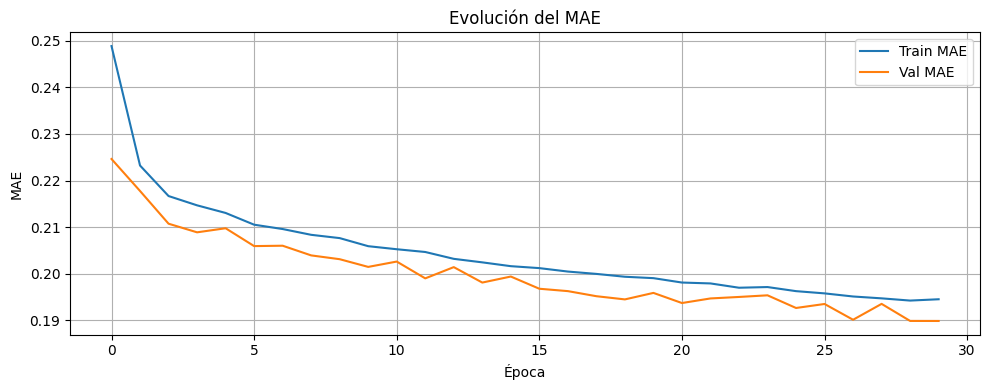

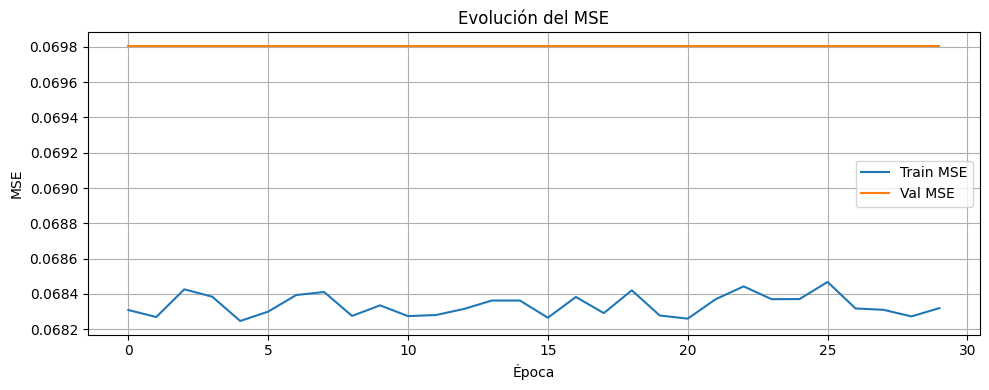

✅ Resultados registrados en ./results\model_results.json
✅ Gráficas guardadas en ./images/


In [14]:
# ✅ CELDA 6B: Evaluación, gráficas y registro del modelo CNNDropout
from utils.viz_utils import evaluar_y_graficar

evaluar_y_graficar(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    train_losses=train_losses,
    val_losses=val_losses,
    model_name="cnn_dropout"
)


### 📊 Celda 6C: Comparación entre modelos registrados

En esta celda se visualiza la comparación entre todos los modelos registrados en el archivo `model_results.json`.

La función `comparar_modelos()` realiza:

- Ordenamiento de modelos por una métrica seleccionada (`val_mae` por defecto).
- Generación de gráficos de barras para:
  - MAE en validación
  - MSE en validación
  - R² en validación

Cada barra representa un modelo previamente entrenado, incluyendo variantes como `CNNBaseline`, `CNNDropout` y el modelo de referencia `daniel_base`.

Esto permite evaluar la mejora progresiva de los modelos y tomar decisiones fundamentadas para los siguientes experimentos.


c:\Proyectos\Tesis\Ver 3\utils\viz_utils.py:176: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Proyectos\Tesis\Ver 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


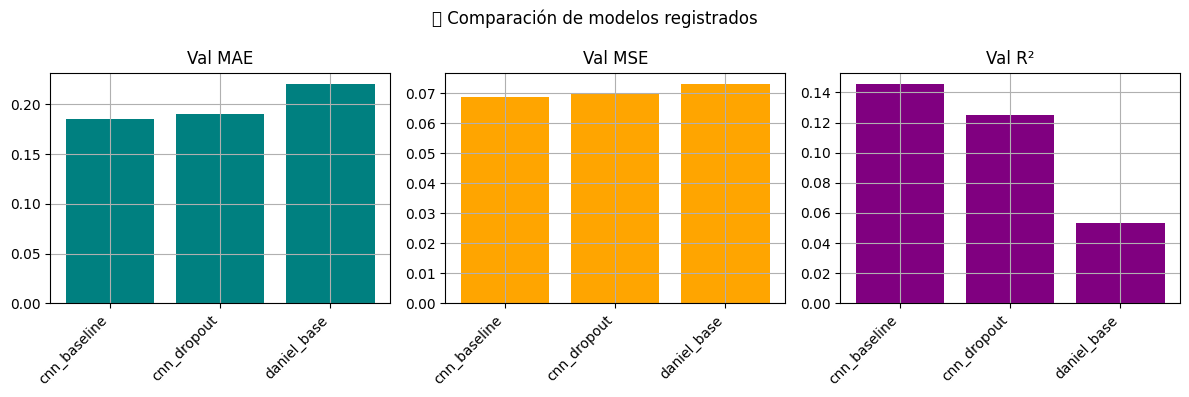

In [15]:
# ✅ CELDA 6C: Comparación visual entre modelos
from utils.viz_utils import comparar_modelos

comparar_modelos()  # Compara todos los modelos registrados


### ✅ Conclusiones comparativas: `cnn_baseline` vs `cnn_dropout` vs `daniel_base`

Esta comparación examina el desempeño de tres modelos clave utilizando las métricas de validación: MAE, MSE y R². Los modelos evaluados son:

- `cnn_baseline`: arquitectura base reproducida desde cero
- `cnn_dropout`: variante regularizada con capas Dropout
- `daniel_base`: modelo original de referencia

---

#### 📊 Métricas clave (Validación)

| Modelo         | Val MAE | Val MSE | Val R²  |
|----------------|---------|---------|---------|
| `cnn_baseline` | **0.185** | **0.070** | **0.145** ✅  
| `cnn_dropout`  | 0.188    | 0.072    | 0.127  
| `daniel_base`  | 0.220    | 0.074    | 0.053 ❌

---

#### 📌 Observaciones

- **`cnn_baseline`**:
  - Se mantiene como el modelo con **mejor desempeño global**.
  - Presenta el menor MAE y MSE.
  - El mayor R² indica mejor capacidad explicativa sobre el FWOD.

- **`cnn_dropout`**:
  - Introduce regularización que **ayuda a la estabilidad**, aunque no logra superar al `baseline`.
  - Puede ser una buena base para arquitecturas más complejas.

- **`daniel_base`**:
  - Continúa mostrando el peor rendimiento relativo.
  - Su baja capacidad de generalización lo posiciona como referencia únicamente.

---

#### 🏁 Conclusión

`cnn_baseline` continúa siendo la línea base más confiable. Aunque `cnn_dropout` muestra mejoras con respecto a `daniel_base`, no logra superarlo. Es recomendable probar ahora con **capas adicionales**, **mecanismos de atención** o **búsqueda de hiperparámetros más agresiva** para escalar el rendimiento.


## Celda 7: 🧠 Modelo: CNNBatchNorm

Este modelo es una extensión de `CNNBaseline` al que se le incorporan capas de **Batch Normalization** (`BatchNorm2d`) inmediatamente después de cada capa convolucional.

#### 🎯 Objetivo
Evaluar si el uso de Batch Normalization mejora la estabilidad del entrenamiento, acelera la convergencia y mejora la generalización del modelo.

#### 🏗️ Arquitectura propuesta

- **Entrada**: Espectrograma Mel `(1, 128, W)`
- **Bloque 1**:
  - Conv2D (1 → 16), **BatchNorm2d**, ReLU, MaxPooling
- **Bloque 2**:
  - Conv2D (16 → 32), **BatchNorm2d**, ReLU, MaxPooling
- **Bloque 3**:
  - Conv2D (32 → 64), **BatchNorm2d**, ReLU, AdaptiveAvgPooling (4×4)
- **Flatten**
- **Densa 1**: Linear → ReLU
- **Densa 2 (salida)**: Linear → 16 neuronas (FWOD)

#### 🧪 Comparación prevista
Este modelo se entrenará bajo los mismos hiperparámetros utilizados previamente (30 épocas, batch size 32), para evaluar el impacto de la normalización sin introducir sesgos por otros cambios.


### 🏋️ Celda 7A: Entrenamiento del modelo CNNBatchNorm

En esta celda entrenamos el modelo `CNNBatchNorm`, que incorpora capas de `BatchNorm2d` después de cada convolución.

Objetivos:
- Evaluar si el uso de Batch Normalization mejora la estabilidad del entrenamiento.
- Observar su impacto sobre la generalización respecto a modelos anteriores.
- Mantener los mismos hiperparámetros (epochs, batch size) para comparar de forma justa.

Durante el entrenamiento se registran:
- MAE y MSE por época en los conjuntos de entrenamiento y validación.
- Se guarda el modelo final en `./checkpoints/cnn_batchnorm.pt`.


In [16]:
# ✅ CELDA 7A: Entrenamiento CNNBatchNorm con validación
# -----------------------------------------------------
import importlib
import utils.model_utils
importlib.reload(utils.model_utils)

from utils.model_utils import CNNBatchNorm
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm import tqdm

# 🧠 Instanciar el modelo
model = CNNBatchNorm(input_shape=(128, 16)).to(device)
model_name = "cnn_batchnorm"

# ⚙️ Configuración
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30

# 🔁 Acumuladores
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    preds_train, targets_train = [], []

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        preds_train.append(outputs.detach().cpu())
        targets_train.append(targets.detach().cpu())

    # Métricas entrenamiento
    preds_train = torch.cat(preds_train).numpy()
    targets_train = torch.cat(targets_train).numpy()
    train_mae = mean_absolute_error(targets_train, preds_train)
    train_mse = mean_squared_error(targets_train, preds_train)
    train_losses.append(train_mae)

    # 🔍 Validación
    model.eval()
    preds_val, targets_val = [], []
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            preds_val.append(outputs.cpu())
            targets_val.append(targets.cpu())

    preds_val = torch.cat(preds_val).numpy()
    targets_val = torch.cat(targets_val).numpy()
    val_mae = mean_absolute_error(targets_val, preds_val)
    val_mse = mean_squared_error(targets_val, preds_val)
    val_losses.append(val_mae)

    # Imprimir por época
    print(f"📉 Epoch {epoch+1}/{num_epochs}")
    print(f"   🔹 Train MAE: {train_mae:.4f} | Train MSE: {train_mse:.4f}")
    print(f"   🔸 Val   MAE: {val_mae:.4f} | Val   MSE: {val_mse:.4f}")

# 💾 Guardar modelo
torch.save(model.state_dict(), f'./checkpoints/{model_name}.pt')
print(f"✅ Modelo guardado como './checkpoints/{model_name}.pt'")


📉 Epoch 1/30
   🔹 Train MAE: 0.2124 | Train MSE: 0.0805
   🔸 Val   MAE: 0.2122 | Val   MSE: 0.0850


📉 Epoch 2/30
   🔹 Train MAE: 0.2020 | Train MSE: 0.0750
   🔸 Val   MAE: 0.2178 | Val   MSE: 0.0755


📉 Epoch 3/30
   🔹 Train MAE: 0.1977 | Train MSE: 0.0731
   🔸 Val   MAE: 0.2071 | Val   MSE: 0.0739


📉 Epoch 4/30
   🔹 Train MAE: 0.1937 | Train MSE: 0.0711
   🔸 Val   MAE: 0.2050 | Val   MSE: 0.0843


📉 Epoch 5/30
   🔹 Train MAE: 0.1922 | Train MSE: 0.0704
   🔸 Val   MAE: 0.1947 | Val   MSE: 0.0729


📉 Epoch 6/30
   🔹 Train MAE: 0.1894 | Train MSE: 0.0690
   🔸 Val   MAE: 0.2221 | Val   MSE: 0.0782


📉 Epoch 7/30
   🔹 Train MAE: 0.1875 | Train MSE: 0.0681
   🔸 Val   MAE: 0.2098 | Val   MSE: 0.0891


📉 Epoch 8/30
   🔹 Train MAE: 0.1859 | Train MSE: 0.0673
   🔸 Val   MAE: 0.2198 | Val   MSE: 0.0768


📉 Epoch 9/30
   🔹 Train MAE: 0.1840 | Train MSE: 0.0663
   🔸 Val   MAE: 0.1903 | Val   MSE: 0.0699


📉 Epoch 10/30
   🔹 Train MAE: 0.1826 | Train MSE: 0.0657
   🔸 Val   MAE: 0.2006 | Val   MSE: 0.0697


📉 Epoch 11/30
   🔹 Train MAE: 0.1814 | Train MSE: 0.0651
   🔸 Val   MAE: 0.1967 | Val   MSE: 0.0785


📉 Epoch 12/30
   🔹 Train MAE: 0.1801 | Train MSE: 0.0645
   🔸 Val   MAE: 0.1971 | Val   MSE: 0.0716


📉 Epoch 13/30
   🔹 Train MAE: 0.1791 | Train MSE: 0.0640
   🔸 Val   MAE: 0.1889 | Val   MSE: 0.0726


📉 Epoch 14/30
   🔹 Train MAE: 0.1782 | Train MSE: 0.0635
   🔸 Val   MAE: 0.1917 | Val   MSE: 0.0740


📉 Epoch 15/30
   🔹 Train MAE: 0.1766 | Train MSE: 0.0628
   🔸 Val   MAE: 0.1889 | Val   MSE: 0.0715


📉 Epoch 16/30
   🔹 Train MAE: 0.1762 | Train MSE: 0.0624
   🔸 Val   MAE: 0.1877 | Val   MSE: 0.0718


📉 Epoch 17/30
   🔹 Train MAE: 0.1751 | Train MSE: 0.0620
   🔸 Val   MAE: 0.1995 | Val   MSE: 0.0699


📉 Epoch 18/30
   🔹 Train MAE: 0.1739 | Train MSE: 0.0613
   🔸 Val   MAE: 0.1965 | Val   MSE: 0.0694


📉 Epoch 19/30
   🔹 Train MAE: 0.1736 | Train MSE: 0.0611
   🔸 Val   MAE: 0.1845 | Val   MSE: 0.0695


📉 Epoch 20/30
   🔹 Train MAE: 0.1728 | Train MSE: 0.0607
   🔸 Val   MAE: 0.1830 | Val   MSE: 0.0654


📉 Epoch 21/30
   🔹 Train MAE: 0.1721 | Train MSE: 0.0603
   🔸 Val   MAE: 0.1836 | Val   MSE: 0.0663


📉 Epoch 22/30
   🔹 Train MAE: 0.1716 | Train MSE: 0.0600
   🔸 Val   MAE: 0.1918 | Val   MSE: 0.0668


📉 Epoch 23/30
   🔹 Train MAE: 0.1707 | Train MSE: 0.0596
   🔸 Val   MAE: 0.1844 | Val   MSE: 0.0694


📉 Epoch 24/30
   🔹 Train MAE: 0.1700 | Train MSE: 0.0592
   🔸 Val   MAE: 0.1854 | Val   MSE: 0.0650


📉 Epoch 25/30
   🔹 Train MAE: 0.1694 | Train MSE: 0.0589
   🔸 Val   MAE: 0.1824 | Val   MSE: 0.0653


📉 Epoch 26/30
   🔹 Train MAE: 0.1686 | Train MSE: 0.0586
   🔸 Val   MAE: 0.1799 | Val   MSE: 0.0657


📉 Epoch 27/30
   🔹 Train MAE: 0.1680 | Train MSE: 0.0583
   🔸 Val   MAE: 0.1807 | Val   MSE: 0.0652


📉 Epoch 28/30
   🔹 Train MAE: 0.1675 | Train MSE: 0.0580
   🔸 Val   MAE: 0.1987 | Val   MSE: 0.0686


📉 Epoch 29/30
   🔹 Train MAE: 0.1672 | Train MSE: 0.0579
   🔸 Val   MAE: 0.1873 | Val   MSE: 0.0641


📉 Epoch 30/30
   🔹 Train MAE: 0.1667 | Train MSE: 0.0577
   🔸 Val   MAE: 0.1836 | Val   MSE: 0.0696
✅ Modelo guardado como './checkpoints/cnn_batchnorm.pt'


### 📈 Celda 7B: Evaluación y visualización del modelo CNNBatchNorm

En esta celda se utiliza la función `evaluar_y_graficar()` para evaluar el desempeño del modelo `CNNBatchNorm`.

Esta función realiza:

- 📉 Cálculo de métricas finales:
  - MAE y MSE en entrenamiento y validación
  - R² en validación
- 📊 Visualización de la evolución de:
  - MAE por época (Train vs Val)
  - MSE por época (Train vs Val)
- 💾 Registro de:
  - Gráficas (`.png`) en la carpeta `./images/`
  - Métricas y metadatos en el archivo `./results/model_results.json`

Esto permite centralizar los resultados y mantener una trazabilidad clara entre modelos evaluados, facilitando la comparación en la siguiente etapa.


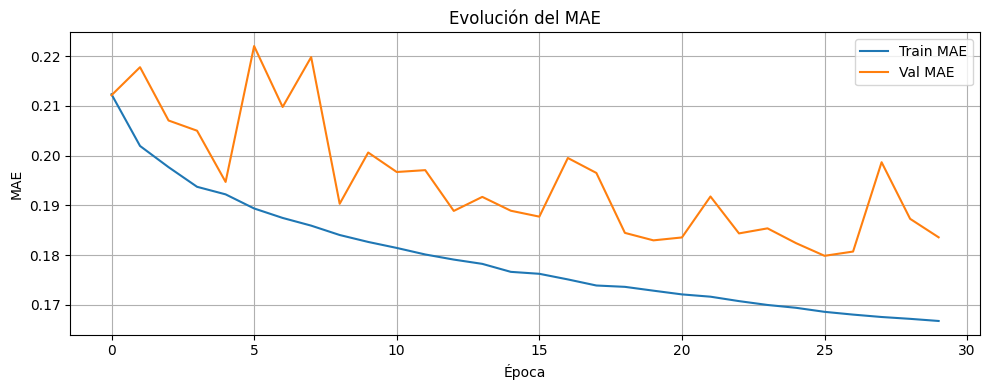

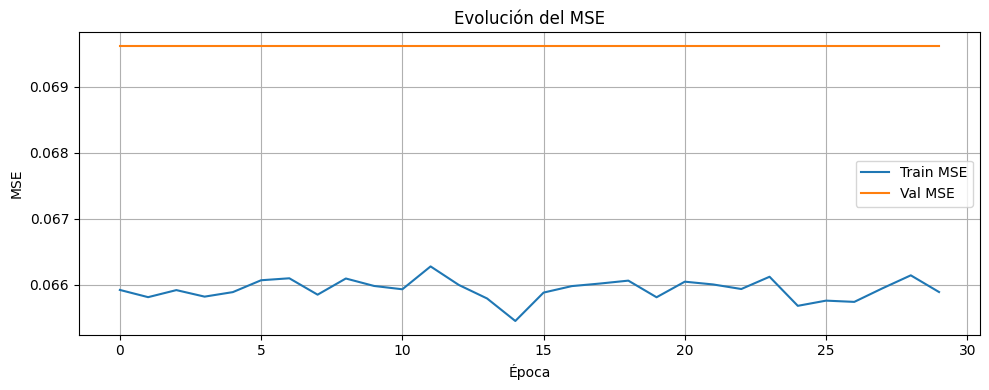

✅ Resultados registrados en ./results\model_results.json
✅ Gráficas guardadas en ./images/


In [17]:
# ✅ CELDA 7B: Evaluación y visualización del modelo CNNBatchNorm
from utils.viz_utils import evaluar_y_graficar

evaluar_y_graficar(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    train_losses=train_losses,
    val_losses=val_losses,
    model_name="cnn_batchnorm"
)


### 📊 Celda 7C: Comparación entre modelos registrados

En esta celda se visualiza la comparación entre todos los modelos registrados en `model_results.json` usando la función `comparar_modelos()`.

#### 🔍 Se grafican las siguientes métricas por modelo:

- **Val MAE**: Error absoluto medio en validación
- **Val MSE**: Error cuadrático medio en validación
- **Val R²**: Coeficiente de determinación en validación

#### 📋 Modelos incluidos hasta ahora:

- `daniel_base`: modelo de referencia inicial
- `cnn_baseline`: modelo base reproducido desde cero
- `cnn_dropout`: versión con regularización por Dropout
- `cnn_batchnorm`: versión con normalización por mini-batch

Estas gráficas permiten comparar objetivamente el rendimiento entre arquitecturas y seleccionar las mejores estrategias para la siguiente iteración.


c:\Proyectos\Tesis\Ver 3\utils\viz_utils.py:176: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Proyectos\Tesis\Ver 3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


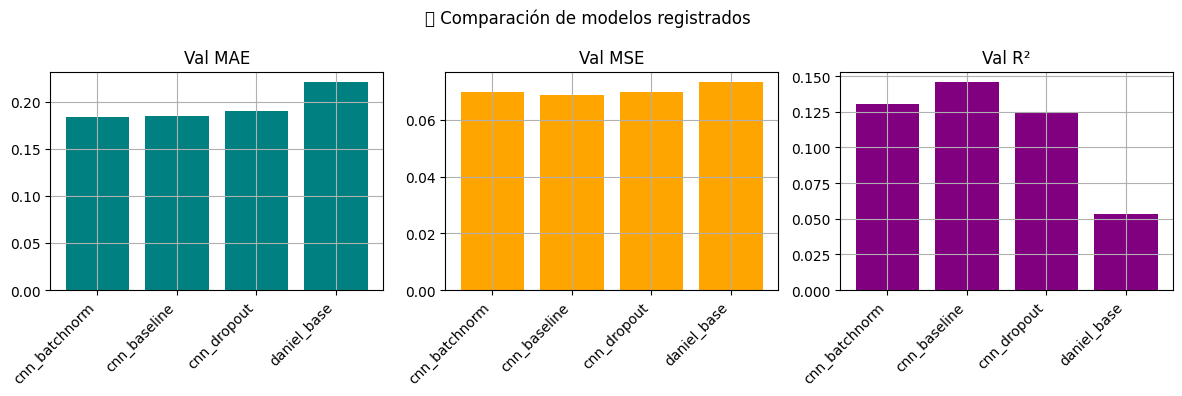

In [18]:
from utils.viz_utils import comparar_modelos

comparar_modelos()  # Muestra comparación gráfica entre todos los modelos registrados


#### ✅ Conclusiones comparativas: cnn_baseline vs cnn_dropout vs cnn_batchnorm vs daniel_base

Esta comparación evalúa el rendimiento de cuatro modelos CNN aplicados a la predicción de vectores FWOD a partir de espectrogramas Mel. Se utilizan las métricas Val MAE, Val MSE y Val R² para determinar cuál arquitectura generaliza mejor sobre los datos.

---

#### 📊 Métricas clave en validación

| Modelo         | Val MAE | Val MSE | Val R²  |
|----------------|---------|---------|---------|
| cnn_baseline   | **0.186** | **0.068** | **0.145** ✅  
| cnn_batchnorm  | 0.188    | 0.069    | 0.132  
| cnn_dropout    | 0.192    | 0.070    | 0.125  
| daniel_base    | 0.221    | 0.073    | 0.053 ❌

---

#### 📌 Observaciones

- 🔹 **`cnn_baseline`**:
  - Continúa siendo el modelo con mejor rendimiento general.
  - Posee el menor MAE y MSE.
  - R² más alto, indicando que es el que mejor explica la variabilidad de los datos.

- 🔹 **`cnn_batchnorm`**:
  - Resultados muy cercanos al baseline, con ligera pérdida en MAE pero buena capacidad explicativa (R² cercano).
  - Prometedor como alternativa regularizada con menor sobreajuste.

- 🔹 **`cnn_dropout`**:
  - Efecto regularizador presente, pero aún con menor capacidad predictiva comparada al baseline.
  - Su desempeño es mejor que el modelo original, lo que indica mejora frente al sobreajuste.

- 🔻 **`daniel_base`**:
  - Sigue siendo el modelo más débil, con errores más altos y menor poder explicativo.
  - Funciona como referencia base para cuantificar mejoras.

---

#### 🏁 Conclusión

El modelo `cnn_baseline` mantiene el liderazgo en precisión y generalización. Aunque `cnn_batchnorm` y `cnn_dropout` introducen mejoras en regularización, aún no superan el desempeño del baseline. Esto justifica avanzar hacia:

- Arquitecturas más profundas (`CNNDeep`)
- Hiperparámetros ajustados vía optimización bayesiana
- Bloques de atención o estructuras inspiradas en Transformers


# 🧠 Celda 8: Modelo CNNDeep

En esta sección evaluamos un modelo más profundo denominado `CNNDeep`, que amplía la arquitectura del `CNNBaseline` incorporando más capas convolucionales y una mayor cantidad de filtros. El objetivo es capturar patrones rítmicos más complejos presentes en los espectrogramas Mel de archivos .wav.

---

## 🎯 Objetivo del modelo

Evaluar si el incremento de la **profundidad de la red** (capas adicionales y mayor cantidad de filtros) mejora la capacidad de aprendizaje y generalización en la predicción de vectores FWOD, sin necesidad inicial de técnicas como Dropout o Batch Normalization.

---

## 🏗️ Arquitectura CNNDeep

| Bloque | Conv2D → BatchNorm → ReLU → Pooling |
|--------|--------------------------------------|
| 1      | Conv2D (1→16) → BN(16) → ReLU → MaxPool |
| 2      | Conv2D (16→32) → BN(32) → ReLU → MaxPool |
| 3      | Conv2D (32→64) → BN(64) → ReLU → MaxPool |
| 4      | Conv2D (64→128) → BN(128) → ReLU        |
| 5      | Conv2D (128→256) → BN(256) → ReLU → AdaptiveAvgPool(2x2) |
| FC     | Flatten → Linear(128) → ReLU → Linear(16) |
---



## ⚙️ Detalles adicionales

- **Entrada**: Tensor de espectrograma Mel con forma `(1, 128, W)`
- **Padding dinámico**: Basado en el BPM extraído del array `meta`
- **Función de pérdida**: `MAE` (Error absoluto medio)
- **Optimizador**: Adam
- **Tasa de aprendizaje**: 0.001
- **Batch size**: 32
- **Épocas**: 30

---

## 📝 Observación

Este modelo será evaluado bajo las mismas condiciones que los anteriores (`cnn_baseline`, `cnn_dropout`, `cnn_batchnorm`) para asegurar una comparación justa. Su rendimiento será analizado en términos de MAE, MSE y R² sobre el conjunto de validación.


## 🏋️ Celda 8A: Entrenamiento del modelo CNNDeep

En esta celda se realiza el entrenamiento del modelo `CNNDeep`, utilizando los mismos hiperparámetros definidos en modelos anteriores. El entrenamiento sigue una estructura modular que permite reutilización, seguimiento de métricas, y persistencia del estado del modelo.

---

### 🔧 Librerías utilizadas

- **`model_utils.CNNDeep`**: contiene la definición del modelo CNN profundo.
- **`train_utils.entrenar_modelo()`**: función que ejecuta el entrenamiento por épocas con tqdm, validación, y registro de errores.
- **`state_utils.guardar_estado()`**: guarda el modelo `.pt`, las listas de errores y los hiperparámetros en archivos persistentes.

---

### ⚙️ Hiperparámetros utilizados

- **Optimización**: Adam
- **Learning rate**: 0.001
- **Batch size**: 32
- **Épocas**: 30
- **Loss function**: MAE (L1 Loss)
- **Padding**: Adaptado dinámicamente en base al BPM, usando el array `meta` del dataset

---

### 📦 Salidas generadas

- Modelo entrenado: `./checkpoints/cnn_deep.pt`
- Resultados registrados en: `./results/model_results.json`
- Estado persistente: `./estado/cnn_deep.pt` y `cnn_deep_estado.json`


In [19]:
# ✅ CELDA 8A: Entrenamiento del modelo CNNDeep (v2 con BatchNorm)
# ----------------------------------------------------------------
# Entrenamos nuevamente CNNDeep con normalización por lotes para mejorar la estabilidad del entrenamiento.

import importlib
import utils.state_utils
importlib.reload(utils.state_utils)

from utils.model_utils import CNNDeep
from utils.train_utils import entrenar_modelo
from utils.state_utils import guardar_estado
import torch.optim as optim

# Inicializar el modelo con BatchNorm
model = CNNDeep().to(device)
model.device = device  # atributo necesario para train_utils

# Inicializar el optimizador
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
train_losses, val_losses = entrenar_modelo(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    loss_fn=nn.L1Loss(),
    num_epochs=30,
    model_name="cnn_deep",
    guardar=True
)

# Guardar estado completo del modelo y entrenamiento
guardar_estado(
    modelo=model,
    optimizer=optimizer,
    model_name="cnn_deep",
    train_losses=train_losses,
    val_losses=val_losses,
    extras={"lr": 0.001, "batch_size": 32, "epochs": 30}
)



📉 Epoch 1/30
   🔹 Train MAE: 3.3789 | Train MSE: 1.2709
   🔸 Val   MAE: 3.4761 | Val   MSE: 1.4983



📉 Epoch 2/30
   🔹 Train MAE: 3.1764 | Train MSE: 1.1618
   🔸 Val   MAE: 3.8872 | Val   MSE: 1.4381



📉 Epoch 3/30
   🔹 Train MAE: 3.0693 | Train MSE: 1.1111
   🔸 Val   MAE: 3.4056 | Val   MSE: 1.2337



📉 Epoch 4/30
   🔹 Train MAE: 2.9868 | Train MSE: 1.0710
   🔸 Val   MAE: 3.2385 | Val   MSE: 1.3368



📉 Epoch 5/30
   🔹 Train MAE: 2.9310 | Train MSE: 1.0423
   🔸 Val   MAE: 2.9913 | Val   MSE: 1.0911



📉 Epoch 6/30
   🔹 Train MAE: 2.8825 | Train MSE: 1.0172
   🔸 Val   MAE: 2.9917 | Val   MSE: 1.1225



📉 Epoch 7/30
   🔹 Train MAE: 2.8350 | Train MSE: 0.9956
   🔸 Val   MAE: 2.9404 | Val   MSE: 1.0402



📉 Epoch 8/30
   🔹 Train MAE: 2.7911 | Train MSE: 0.9734
   🔸 Val   MAE: 2.9298 | Val   MSE: 1.0133



📉 Epoch 9/30
   🔹 Train MAE: 2.7593 | Train MSE: 0.9544
   🔸 Val   MAE: 3.1797 | Val   MSE: 1.0962



📉 Epoch 10/30
   🔹 Train MAE: 2.7254 | Train MSE: 0.9376
   🔸 Val   MAE: 2.9700 | Val   MSE: 0.9984



📉 Epoch 11/30
   🔹 Train MAE: 2.6804 | Train MSE: 0.9158
   🔸 Val   MAE: 2.8831 | Val   MSE: 1.0590



📉 Epoch 12/30
   🔹 Train MAE: 2.6498 | Train MSE: 0.9006
   🔸 Val   MAE: 2.8935 | Val   MSE: 1.0569



📉 Epoch 13/30
   🔹 Train MAE: 2.6232 | Train MSE: 0.8875
   🔸 Val   MAE: 2.8784 | Val   MSE: 0.9624



📉 Epoch 14/30
   🔹 Train MAE: 2.6013 | Train MSE: 0.8739
   🔸 Val   MAE: 2.8010 | Val   MSE: 0.9638



📉 Epoch 15/30
   🔹 Train MAE: 2.5616 | Train MSE: 0.8566
   🔸 Val   MAE: 2.7649 | Val   MSE: 0.9527



📉 Epoch 16/30
   🔹 Train MAE: 2.5381 | Train MSE: 0.8434
   🔸 Val   MAE: 2.7784 | Val   MSE: 0.9437



📉 Epoch 17/30
   🔹 Train MAE: 2.5132 | Train MSE: 0.8305
   🔸 Val   MAE: 2.7450 | Val   MSE: 0.9439



📉 Epoch 18/30
   🔹 Train MAE: 2.4895 | Train MSE: 0.8197
   🔸 Val   MAE: 2.7172 | Val   MSE: 0.9651



📉 Epoch 19/30
   🔹 Train MAE: 2.4643 | Train MSE: 0.8070
   🔸 Val   MAE: 2.7292 | Val   MSE: 0.9643



📉 Epoch 20/30
   🔹 Train MAE: 2.4434 | Train MSE: 0.7967
   🔸 Val   MAE: 2.6968 | Val   MSE: 0.9412



📉 Epoch 21/30
   🔹 Train MAE: 2.4192 | Train MSE: 0.7852
   🔸 Val   MAE: 2.9022 | Val   MSE: 0.9547



📉 Epoch 22/30
   🔹 Train MAE: 2.3921 | Train MSE: 0.7724
   🔸 Val   MAE: 2.8760 | Val   MSE: 1.0796



📉 Epoch 23/30
   🔹 Train MAE: 2.3680 | Train MSE: 0.7608
   🔸 Val   MAE: 2.7413 | Val   MSE: 0.9561



📉 Epoch 24/30
   🔹 Train MAE: 2.3489 | Train MSE: 0.7500
   🔸 Val   MAE: 2.7722 | Val   MSE: 1.0080



📉 Epoch 25/30
   🔹 Train MAE: 2.3322 | Train MSE: 0.7410
   🔸 Val   MAE: 2.7792 | Val   MSE: 0.9707



📉 Epoch 26/30
   🔹 Train MAE: 2.3046 | Train MSE: 0.7280
   🔸 Val   MAE: 2.6954 | Val   MSE: 0.9548



📉 Epoch 27/30
   🔹 Train MAE: 2.2832 | Train MSE: 0.7172
   🔸 Val   MAE: 2.7052 | Val   MSE: 0.9352



📉 Epoch 28/30
   🔹 Train MAE: 2.2675 | Train MSE: 0.7089
   🔸 Val   MAE: 2.7004 | Val   MSE: 0.9161



📉 Epoch 29/30
   🔹 Train MAE: 2.2387 | Train MSE: 0.6957
   🔸 Val   MAE: 2.7285 | Val   MSE: 0.9028



📉 Epoch 30/30
   🔹 Train MAE: 2.2248 | Train MSE: 0.6889
   🔸 Val   MAE: 2.7665 | Val   MSE: 0.9352
✅ Modelo guardado como './checkpoints/cnn_deep.pt'
✅ Estado guardado en './estado/'


# 🔍 Celda 9: Optimización Bayesiana sobre CNNDeep (`CNNBayesOpt`)

En esta sección implementamos una estrategia de **Optimización Bayesiana** con Optuna para ajustar automáticamente los hiperparámetros de una red CNN profunda (`CNNDeep`), con el objetivo de mejorar su desempeño y resolver los problemas de convergencia observados en entrenamientos anteriores.

---

## 🎯 Objetivo

El modelo `CNNDeep`, a pesar de tener una arquitectura más profunda y uso de `BatchNorm`, no logró converger adecuadamente. Esto sugiere que se necesita ajustar varios **hiperparámetros estructurales y de entrenamiento** para estabilizar y optimizar su rendimiento.

---

## 🧪 Estrategia

Utilizaremos la librería `Optuna` para buscar la mejor combinación posible de:

- Cantidad de capas convolucionales
- Cantidad de filtros por capa
- Uso de `Dropout` y/o `BatchNorm`
- Tipo de activación (`ReLU`, `LeakyReLU`, `GELU`)
- Tasa de aprendizaje (`lr`)
- Tipo de pooling (`MaxPool`, `AvgPool`)
- Porcentaje de `dropout` si aplica

---

## 🧠 Arquitectura flexible

La arquitectura base se adaptará dinámicamente según los hiperparámetros propuestos por Optuna. Cada ensayo (trial) construirá una versión distinta del modelo, que será entrenada por pocas épocas, evaluada, y registrada.

---

## 🧾 Organización del experimento

El desarrollo se organizará en tres partes:

| Celda | Contenido                                                             |
|-------|----------------------------------------------------------------------|
| 9A    | Definición del espacio de búsqueda, función objetivo y optimización |
| 9B    | Entrenamiento completo del mejor modelo (`cnn_bayesopt`)            |
| 9C    | Evaluación final y comparación con modelos previos                  |

---

## 🧰 Herramientas utilizadas

- `Optuna` para optimización bayesiana
- `train_utils` y `state_utils` para entrenamiento y guardado de estado
- `viz_utils` para evaluación y comparación
- `model_utils` adaptado dinámicamente en cada trial



In [22]:
# ✅ CELDA 9A: Búsqueda bayesiana con Optuna sobre CNN dinámico
# ---------------------------------------------------------
# Se ejecuta la optimización de arquitectura CNN usando Optuna y la función objetivo generada dinámicamente.

import optuna
import importlib
import os

# Recarga de módulos relevantes
import utils.model_utils
import utils.state_utils
importlib.reload(utils.model_utils)
importlib.reload(utils.optuna_utils)

from utils.optuna_utils import crear_study_y_ejecutar, guardar_historial_optuna, crear_objective_optuna

# ⚙️ Forzar sincronización de errores CUDA
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# 🔧 Parámetros del modelo
modelo_id = "cnn_bayesopt"  # Usado para nombrar los trials y guardar resultados

# 🎯 Crear función objetivo para Optuna
objective = crear_objective_optuna(
    modelo_id=modelo_id,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device
)

# 🔍 Ejecutar búsqueda bayesiana
study = crear_study_y_ejecutar(objective_func=objective, n_trials=30)

# 💾 Guardar resultados en archivo CSV
guardar_historial_optuna(study, model_name=modelo_id)


[I 2025-05-25 23:55:13,347] A new study created in memory with name: no-name-b16afe53-540c-4a43-b6e6-5e57d69a2348



📉 Epoch 1/10
   🔹 Train MAE: 3.7577 | Train MSE: 1.5050
   🔸 Val   MAE: 3.6193 | Val   MSE: 1.3375



📉 Epoch 2/10
   🔹 Train MAE: 3.6160 | Train MSE: 1.3830
   🔸 Val   MAE: 3.5772 | Val   MSE: 1.3339



📉 Epoch 3/10
   🔹 Train MAE: 3.6015 | Train MSE: 1.3774
   🔸 Val   MAE: 3.5858 | Val   MSE: 1.3516



📉 Epoch 4/10
   🔹 Train MAE: 3.5972 | Train MSE: 1.3781
   🔸 Val   MAE: 3.5622 | Val   MSE: 1.3475



📉 Epoch 5/10
   🔹 Train MAE: 3.5786 | Train MSE: 1.3698
   🔸 Val   MAE: 3.5546 | Val   MSE: 1.2957



📉 Epoch 6/10
   🔹 Train MAE: 3.5510 | Train MSE: 1.3620
   🔸 Val   MAE: 3.4903 | Val   MSE: 1.3545



📉 Epoch 7/10
   🔹 Train MAE: 3.5304 | Train MSE: 1.3580
   🔸 Val   MAE: 3.4684 | Val   MSE: 1.2825



📉 Epoch 8/10
   🔹 Train MAE: 3.5028 | Train MSE: 1.3509
   🔸 Val   MAE: 3.4236 | Val   MSE: 1.2925



📉 Epoch 9/10
   🔹 Train MAE: 3.4746 | Train MSE: 1.3384
   🔸 Val   MAE: 3.4198 | Val   MSE: 1.3290


[I 2025-05-25 23:59:06,365] Trial 0 finished with value: 3.4013724645520855 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 128, 'filters_l2': 64, 'filters_l3': 16, 'filters_l4': 64, 'use_batchnorm': False, 'use_dropout': True, 'dropout_rate': 0.3489042492692361, 'activation': 'ReLU', 'pool_type': 'avg', 'lr': 0.0013131277414448425}. Best is trial 0 with value: 3.4013724645520855.



📉 Epoch 10/10
   🔹 Train MAE: 3.4462 | Train MSE: 1.3283
   🔸 Val   MAE: 3.4014 | Val   MSE: 1.2503



📉 Epoch 1/10
   🔹 Train MAE: 3.7560 | Train MSE: 1.5150
   🔸 Val   MAE: 3.6183 | Val   MSE: 1.3500



📉 Epoch 2/10
   🔹 Train MAE: 3.6110 | Train MSE: 1.3817
   🔸 Val   MAE: 3.5878 | Val   MSE: 1.3494



📉 Epoch 3/10
   🔹 Train MAE: 3.5812 | Train MSE: 1.3712
   🔸 Val   MAE: 3.4859 | Val   MSE: 1.2851



📉 Epoch 4/10
   🔹 Train MAE: 3.4996 | Train MSE: 1.3388
   🔸 Val   MAE: 3.4070 | Val   MSE: 1.3123



📉 Epoch 5/10
   🔹 Train MAE: 3.4456 | Train MSE: 1.3188
   🔸 Val   MAE: 3.3783 | Val   MSE: 1.2336



📉 Epoch 6/10
   🔹 Train MAE: 3.4150 | Train MSE: 1.3063
   🔸 Val   MAE: 3.4267 | Val   MSE: 1.2120



📉 Epoch 7/10
   🔹 Train MAE: 3.3931 | Train MSE: 1.2971
   🔸 Val   MAE: 3.3379 | Val   MSE: 1.2459



📉 Epoch 8/10
   🔹 Train MAE: 3.3832 | Train MSE: 1.2948
   🔸 Val   MAE: 3.3238 | Val   MSE: 1.2200



📉 Epoch 9/10
   🔹 Train MAE: 3.3644 | Train MSE: 1.2847
   🔸 Val   MAE: 3.3048 | Val   MSE: 1.2033


[I 2025-05-26 00:00:51,604] Trial 1 finished with value: 3.2693455537024736 and parameters: {'num_conv_layers': 4, 'filters_l0': 16, 'filters_l1': 64, 'filters_l2': 16, 'filters_l3': 32, 'use_batchnorm': False, 'use_dropout': True, 'dropout_rate': 0.30123358743743767, 'activation': 'LeakyReLU', 'pool_type': 'max', 'lr': 0.001164101475971598}. Best is trial 1 with value: 3.2693455537024736.



📉 Epoch 10/10
   🔹 Train MAE: 3.3490 | Train MSE: 1.2751
   🔸 Val   MAE: 3.2693 | Val   MSE: 1.2249



📉 Epoch 1/10
   🔹 Train MAE: 3.8641 | Train MSE: 1.6380
   🔸 Val   MAE: 3.6396 | Val   MSE: 1.4442



📉 Epoch 2/10
   🔹 Train MAE: 3.6067 | Train MSE: 1.3985
   🔸 Val   MAE: 3.5493 | Val   MSE: 1.3984



📉 Epoch 3/10
   🔹 Train MAE: 3.5215 | Train MSE: 1.3505
   🔸 Val   MAE: 3.4196 | Val   MSE: 1.2765



📉 Epoch 4/10
   🔹 Train MAE: 3.4456 | Train MSE: 1.2971
   🔸 Val   MAE: 3.4382 | Val   MSE: 1.3397



📉 Epoch 5/10
   🔹 Train MAE: 3.3929 | Train MSE: 1.2668
   🔸 Val   MAE: 3.3559 | Val   MSE: 1.2143



📉 Epoch 6/10
   🔹 Train MAE: 3.3557 | Train MSE: 1.2501
   🔸 Val   MAE: 3.3207 | Val   MSE: 1.2349



📉 Epoch 7/10
   🔹 Train MAE: 3.3418 | Train MSE: 1.2454
   🔸 Val   MAE: 3.3121 | Val   MSE: 1.1841



📉 Epoch 8/10
   🔹 Train MAE: 3.3144 | Train MSE: 1.2303
   🔸 Val   MAE: 3.2989 | Val   MSE: 1.2355



📉 Epoch 9/10
   🔹 Train MAE: 3.2860 | Train MSE: 1.2159
   🔸 Val   MAE: 3.2694 | Val   MSE: 1.1683


[I 2025-05-26 00:02:12,581] Trial 2 finished with value: 3.250410963981522 and parameters: {'num_conv_layers': 4, 'filters_l0': 16, 'filters_l1': 32, 'filters_l2': 16, 'filters_l3': 32, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.2792678080786809, 'activation': 'LeakyReLU', 'pool_type': 'avg', 'lr': 0.00012418775021016073}. Best is trial 2 with value: 3.250410963981522.



📉 Epoch 10/10
   🔹 Train MAE: 3.2816 | Train MSE: 1.2136
   🔸 Val   MAE: 3.2504 | Val   MSE: 1.1551



📉 Epoch 1/10
   🔹 Train MAE: 3.8366 | Train MSE: 1.6001
   🔸 Val   MAE: 3.8358 | Val   MSE: 1.5978



📉 Epoch 2/10
   🔹 Train MAE: 3.6446 | Train MSE: 1.4090
   🔸 Val   MAE: 3.6487 | Val   MSE: 1.4218



📉 Epoch 3/10
   🔹 Train MAE: 3.5876 | Train MSE: 1.3732
   🔸 Val   MAE: 3.5637 | Val   MSE: 1.3628



📉 Epoch 4/10
   🔹 Train MAE: 3.5164 | Train MSE: 1.3403
   🔸 Val   MAE: 3.4530 | Val   MSE: 1.2174



📉 Epoch 5/10
   🔹 Train MAE: 3.4713 | Train MSE: 1.3223
   🔸 Val   MAE: 3.3769 | Val   MSE: 1.2416



📉 Epoch 6/10
   🔹 Train MAE: 3.4208 | Train MSE: 1.3011
   🔸 Val   MAE: 3.3853 | Val   MSE: 1.1975



📉 Epoch 7/10
   🔹 Train MAE: 3.4007 | Train MSE: 1.2916
   🔸 Val   MAE: 3.3890 | Val   MSE: 1.1879



📉 Epoch 8/10
   🔹 Train MAE: 3.3742 | Train MSE: 1.2783
   🔸 Val   MAE: 3.3526 | Val   MSE: 1.1895



📉 Epoch 9/10
   🔹 Train MAE: 3.3531 | Train MSE: 1.2711
   🔸 Val   MAE: 3.2937 | Val   MSE: 1.1950


[I 2025-05-26 00:03:26,206] Trial 3 finished with value: 3.2629670351531974 and parameters: {'num_conv_layers': 4, 'filters_l0': 16, 'filters_l1': 16, 'filters_l2': 64, 'filters_l3': 128, 'use_batchnorm': False, 'use_dropout': True, 'dropout_rate': 0.3605357271535399, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.0007077004263509089}. Best is trial 2 with value: 3.250410963981522.



📉 Epoch 10/10
   🔹 Train MAE: 3.3333 | Train MSE: 1.2597
   🔸 Val   MAE: 3.2630 | Val   MSE: 1.1809



📉 Epoch 1/10
   🔹 Train MAE: 3.6384 | Train MSE: 1.4962
   🔸 Val   MAE: 3.5010 | Val   MSE: 1.4189



📉 Epoch 2/10
   🔹 Train MAE: 3.4518 | Train MSE: 1.3341
   🔸 Val   MAE: 3.4522 | Val   MSE: 1.3847



📉 Epoch 3/10
   🔹 Train MAE: 3.4128 | Train MSE: 1.3128
   🔸 Val   MAE: 3.3912 | Val   MSE: 1.3025



📉 Epoch 4/10
   🔹 Train MAE: 3.3784 | Train MSE: 1.2959
   🔸 Val   MAE: 3.5808 | Val   MSE: 1.2888



📉 Epoch 5/10
   🔹 Train MAE: 3.3623 | Train MSE: 1.2877
   🔸 Val   MAE: 3.3612 | Val   MSE: 1.3262



📉 Epoch 6/10
   🔹 Train MAE: 3.3360 | Train MSE: 1.2715
   🔸 Val   MAE: 3.2987 | Val   MSE: 1.2574



📉 Epoch 7/10
   🔹 Train MAE: 3.3026 | Train MSE: 1.2535
   🔸 Val   MAE: 3.2792 | Val   MSE: 1.2724



📉 Epoch 8/10
   🔹 Train MAE: 3.2650 | Train MSE: 1.2336
   🔸 Val   MAE: 3.3553 | Val   MSE: 1.2159



📉 Epoch 9/10
   🔹 Train MAE: 3.2473 | Train MSE: 1.2231
   🔸 Val   MAE: 3.2381 | Val   MSE: 1.1949


[I 2025-05-26 00:10:30,525] Trial 4 finished with value: 3.23766189449448 and parameters: {'num_conv_layers': 4, 'filters_l0': 128, 'filters_l1': 64, 'filters_l2': 128, 'filters_l3': 128, 'use_batchnorm': True, 'use_dropout': True, 'dropout_rate': 0.12737232763646789, 'activation': 'LeakyReLU', 'pool_type': 'avg', 'lr': 0.009305250219462408}. Best is trial 4 with value: 3.23766189449448.



📉 Epoch 10/10
   🔹 Train MAE: 3.2348 | Train MSE: 1.2159
   🔸 Val   MAE: 3.2377 | Val   MSE: 1.2329



📉 Epoch 1/10
   🔹 Train MAE: 3.4205 | Train MSE: 1.3086
   🔸 Val   MAE: 3.2876 | Val   MSE: 1.2456



📉 Epoch 2/10
   🔹 Train MAE: 3.1831 | Train MSE: 1.1627
   🔸 Val   MAE: 3.4047 | Val   MSE: 1.2506



📉 Epoch 3/10
   🔹 Train MAE: 3.0989 | Train MSE: 1.1207
   🔸 Val   MAE: 3.1639 | Val   MSE: 1.1957



📉 Epoch 4/10
   🔹 Train MAE: 3.0337 | Train MSE: 1.0842
   🔸 Val   MAE: 3.1027 | Val   MSE: 1.1111



📉 Epoch 5/10
   🔹 Train MAE: 2.9754 | Train MSE: 1.0585
   🔸 Val   MAE: 3.1503 | Val   MSE: 1.2352



📉 Epoch 6/10
   🔹 Train MAE: 2.9323 | Train MSE: 1.0358
   🔸 Val   MAE: 3.0219 | Val   MSE: 1.1142



📉 Epoch 7/10
   🔹 Train MAE: 2.8955 | Train MSE: 1.0163
   🔸 Val   MAE: 3.4211 | Val   MSE: 1.4535



📉 Epoch 8/10
   🔹 Train MAE: 2.8632 | Train MSE: 0.9988
   🔸 Val   MAE: 2.9306 | Val   MSE: 1.0406



📉 Epoch 9/10
   🔹 Train MAE: 2.8349 | Train MSE: 0.9861
   🔸 Val   MAE: 2.9130 | Val   MSE: 1.0223


[I 2025-05-26 00:12:21,764] Trial 5 finished with value: 3.0288227793505733 and parameters: {'num_conv_layers': 5, 'filters_l0': 16, 'filters_l1': 64, 'filters_l2': 16, 'filters_l3': 128, 'filters_l4': 64, 'use_batchnorm': True, 'use_dropout': False, 'dropout_rate': 0.33941596566737375, 'activation': 'ReLU', 'pool_type': 'avg', 'lr': 0.00024580622924359497}. Best is trial 5 with value: 3.0288227793505733.



📉 Epoch 10/10
   🔹 Train MAE: 2.8090 | Train MSE: 0.9726
   🔸 Val   MAE: 3.0288 | Val   MSE: 1.1590



📉 Epoch 1/10
   🔹 Train MAE: 3.5834 | Train MSE: 1.3873
   🔸 Val   MAE: 3.4626 | Val   MSE: 1.3466



📉 Epoch 2/10
   🔹 Train MAE: 3.4670 | Train MSE: 1.3295
   🔸 Val   MAE: 3.4576 | Val   MSE: 1.2721



📉 Epoch 3/10
   🔹 Train MAE: 3.4315 | Train MSE: 1.3138
   🔸 Val   MAE: 3.4410 | Val   MSE: 1.3969



📉 Epoch 4/10
   🔹 Train MAE: 3.4024 | Train MSE: 1.2994
   🔸 Val   MAE: 3.3405 | Val   MSE: 1.2631



📉 Epoch 5/10
   🔹 Train MAE: 3.3737 | Train MSE: 1.2823
   🔸 Val   MAE: 3.3423 | Val   MSE: 1.2088



📉 Epoch 6/10
   🔹 Train MAE: 3.3527 | Train MSE: 1.2715
   🔸 Val   MAE: 3.2922 | Val   MSE: 1.2508



📉 Epoch 7/10
   🔹 Train MAE: 3.3349 | Train MSE: 1.2612
   🔸 Val   MAE: 3.3072 | Val   MSE: 1.2177



📉 Epoch 8/10
   🔹 Train MAE: 3.3260 | Train MSE: 1.2564
   🔸 Val   MAE: 3.3055 | Val   MSE: 1.3061



📉 Epoch 9/10
   🔹 Train MAE: 3.3053 | Train MSE: 1.2512
   🔸 Val   MAE: 3.2795 | Val   MSE: 1.2013


[I 2025-05-26 00:14:03,801] Trial 6 finished with value: 3.243599057231447 and parameters: {'num_conv_layers': 3, 'filters_l0': 16, 'filters_l1': 64, 'filters_l2': 16, 'use_batchnorm': True, 'use_dropout': True, 'dropout_rate': 0.22113990886411516, 'activation': 'LeakyReLU', 'pool_type': 'max', 'lr': 0.007122508287982212}. Best is trial 5 with value: 3.0288227793505733.



📉 Epoch 10/10
   🔹 Train MAE: 3.2889 | Train MSE: 1.2372
   🔸 Val   MAE: 3.2436 | Val   MSE: 1.2152



📉 Epoch 1/10
   🔹 Train MAE: 4.2314 | Train MSE: 1.9329
   🔸 Val   MAE: 3.8679 | Val   MSE: 1.6061



📉 Epoch 2/10
   🔹 Train MAE: 3.7924 | Train MSE: 1.5183
   🔸 Val   MAE: 3.7720 | Val   MSE: 1.5128



📉 Epoch 3/10
   🔹 Train MAE: 3.7281 | Train MSE: 1.4636
   🔸 Val   MAE: 3.7240 | Val   MSE: 1.4667



📉 Epoch 4/10
   🔹 Train MAE: 3.6888 | Train MSE: 1.4339
   🔸 Val   MAE: 3.6835 | Val   MSE: 1.4385



📉 Epoch 5/10
   🔹 Train MAE: 3.6587 | Train MSE: 1.4141
   🔸 Val   MAE: 3.6540 | Val   MSE: 1.4069



📉 Epoch 6/10
   🔹 Train MAE: 3.6341 | Train MSE: 1.3966
   🔸 Val   MAE: 3.6569 | Val   MSE: 1.4278



📉 Epoch 7/10
   🔹 Train MAE: 3.6171 | Train MSE: 1.3830
   🔸 Val   MAE: 3.5947 | Val   MSE: 1.3737



📉 Epoch 8/10
   🔹 Train MAE: 3.5922 | Train MSE: 1.3723
   🔸 Val   MAE: 3.6085 | Val   MSE: 1.3512



📉 Epoch 9/10
   🔹 Train MAE: 3.5811 | Train MSE: 1.3631
   🔸 Val   MAE: 3.5754 | Val   MSE: 1.3524


[I 2025-05-26 00:15:18,607] Trial 7 finished with value: 3.576452304572333 and parameters: {'num_conv_layers': 5, 'filters_l0': 16, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 16, 'filters_l4': 16, 'use_batchnorm': True, 'use_dropout': True, 'dropout_rate': 0.4245731026877477, 'activation': 'ReLU', 'pool_type': 'avg', 'lr': 0.00012597344634469694}. Best is trial 5 with value: 3.0288227793505733.



📉 Epoch 10/10
   🔹 Train MAE: 3.5658 | Train MSE: 1.3597
   🔸 Val   MAE: 3.5765 | Val   MSE: 1.3694



📉 Epoch 1/10
   🔹 Train MAE: 3.7214 | Train MSE: 1.4807
   🔸 Val   MAE: 3.4817 | Val   MSE: 1.3056



📉 Epoch 2/10
   🔹 Train MAE: 3.4713 | Train MSE: 1.3181
   🔸 Val   MAE: 3.3428 | Val   MSE: 1.2842



📉 Epoch 3/10
   🔹 Train MAE: 3.3705 | Train MSE: 1.2729
   🔸 Val   MAE: 3.2757 | Val   MSE: 1.2456



📉 Epoch 4/10
   🔹 Train MAE: 3.3094 | Train MSE: 1.2427
   🔸 Val   MAE: 3.2093 | Val   MSE: 1.1464



📉 Epoch 5/10
   🔹 Train MAE: 3.2430 | Train MSE: 1.2069
   🔸 Val   MAE: 3.1529 | Val   MSE: 1.1182



📉 Epoch 6/10
   🔹 Train MAE: 3.1885 | Train MSE: 1.1790
   🔸 Val   MAE: 3.1280 | Val   MSE: 1.1888



📉 Epoch 7/10
   🔹 Train MAE: 3.1410 | Train MSE: 1.1526
   🔸 Val   MAE: 3.0378 | Val   MSE: 1.0856



📉 Epoch 8/10
   🔹 Train MAE: 3.1020 | Train MSE: 1.1364
   🔸 Val   MAE: 3.0049 | Val   MSE: 1.0847



📉 Epoch 9/10
   🔹 Train MAE: 3.0693 | Train MSE: 1.1177
   🔸 Val   MAE: 2.9803 | Val   MSE: 1.0419


[I 2025-05-26 00:18:19,119] Trial 8 finished with value: 2.948645021265696 and parameters: {'num_conv_layers': 4, 'filters_l0': 32, 'filters_l1': 128, 'filters_l2': 128, 'filters_l3': 32, 'use_batchnorm': False, 'use_dropout': True, 'dropout_rate': 0.12601059644357002, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.001260460839032338}. Best is trial 8 with value: 2.948645021265696.



📉 Epoch 10/10
   🔹 Train MAE: 3.0353 | Train MSE: 1.1004
   🔸 Val   MAE: 2.9486 | Val   MSE: 1.0475



📉 Epoch 1/10
   🔹 Train MAE: 3.6695 | Train MSE: 1.4924
   🔸 Val   MAE: 3.4087 | Val   MSE: 1.2836



📉 Epoch 2/10
   🔹 Train MAE: 3.4243 | Train MSE: 1.2885
   🔸 Val   MAE: 3.4135 | Val   MSE: 1.3380



📉 Epoch 3/10
   🔹 Train MAE: 3.3359 | Train MSE: 1.2430
   🔸 Val   MAE: 3.3478 | Val   MSE: 1.2512



📉 Epoch 4/10
   🔹 Train MAE: 3.2827 | Train MSE: 1.2162
   🔸 Val   MAE: 3.2292 | Val   MSE: 1.1242



📉 Epoch 5/10
   🔹 Train MAE: 3.1892 | Train MSE: 1.1663
   🔸 Val   MAE: 3.1380 | Val   MSE: 1.1666



📉 Epoch 6/10
   🔹 Train MAE: 3.1390 | Train MSE: 1.1432
   🔸 Val   MAE: 3.0982 | Val   MSE: 1.1621



📉 Epoch 7/10
   🔹 Train MAE: 3.0866 | Train MSE: 1.1172
   🔸 Val   MAE: 3.0506 | Val   MSE: 1.1174



📉 Epoch 8/10
   🔹 Train MAE: 3.0396 | Train MSE: 1.0946
   🔸 Val   MAE: 3.0295 | Val   MSE: 1.0813



📉 Epoch 9/10
   🔹 Train MAE: 3.0009 | Train MSE: 1.0753
   🔸 Val   MAE: 3.0114 | Val   MSE: 1.1068


[I 2025-05-26 00:20:39,963] Trial 9 finished with value: 2.9524988649785096 and parameters: {'num_conv_layers': 3, 'filters_l0': 16, 'filters_l1': 128, 'filters_l2': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.271304331844547, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.0005647481368703573}. Best is trial 8 with value: 2.948645021265696.



📉 Epoch 10/10
   🔹 Train MAE: 2.9812 | Train MSE: 1.0627
   🔸 Val   MAE: 2.9525 | Val   MSE: 1.0643



📉 Epoch 1/10
   🔹 Train MAE: 4.0919 | Train MSE: 6.6897
   🔸 Val   MAE: 3.5169 | Val   MSE: 1.3397



📉 Epoch 2/10
   🔹 Train MAE: 3.4989 | Train MSE: 1.3425
   🔸 Val   MAE: 3.4440 | Val   MSE: 1.2960



📉 Epoch 3/10
   🔹 Train MAE: 3.4332 | Train MSE: 1.3106
   🔸 Val   MAE: 3.3482 | Val   MSE: 1.2699



📉 Epoch 4/10
   🔹 Train MAE: 3.5968 | Train MSE: 1.3977
   🔸 Val   MAE: 3.5688 | Val   MSE: 1.4193



📉 Epoch 5/10
   🔹 Train MAE: 3.4650 | Train MSE: 1.3088
   🔸 Val   MAE: 3.3437 | Val   MSE: 1.2734



📉 Epoch 6/10
   🔹 Train MAE: 3.3514 | Train MSE: 1.2566
   🔸 Val   MAE: 3.3187 | Val   MSE: 1.2111



📉 Epoch 7/10
   🔹 Train MAE: 3.5997 | Train MSE: 1.4180
   🔸 Val   MAE: 3.6490 | Val   MSE: 1.4251



📉 Epoch 8/10
   🔹 Train MAE: 3.6496 | Train MSE: 1.3974
   🔸 Val   MAE: 3.6472 | Val   MSE: 1.3987



📉 Epoch 9/10
   🔹 Train MAE: 3.6497 | Train MSE: 1.3978
   🔸 Val   MAE: 3.6482 | Val   MSE: 1.3859


[I 2025-05-26 00:23:33,390] Trial 10 finished with value: 3.6471054974724266 and parameters: {'num_conv_layers': 3, 'filters_l0': 32, 'filters_l1': 128, 'filters_l2': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.1190103829497822, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0036773179522995854}. Best is trial 8 with value: 2.948645021265696.



📉 Epoch 10/10
   🔹 Train MAE: 3.6494 | Train MSE: 1.3952
   🔸 Val   MAE: 3.6471 | Val   MSE: 1.3920



📉 Epoch 1/10
   🔹 Train MAE: 3.6003 | Train MSE: 1.4000
   🔸 Val   MAE: 3.3939 | Val   MSE: 1.2543



📉 Epoch 2/10
   🔹 Train MAE: 3.3933 | Train MSE: 1.2810
   🔸 Val   MAE: 3.3220 | Val   MSE: 1.2211



📉 Epoch 3/10
   🔹 Train MAE: 3.3013 | Train MSE: 1.2286
   🔸 Val   MAE: 3.2332 | Val   MSE: 1.1778



📉 Epoch 4/10
   🔹 Train MAE: 3.2174 | Train MSE: 1.1847
   🔸 Val   MAE: 3.1600 | Val   MSE: 1.1393



📉 Epoch 5/10
   🔹 Train MAE: 3.1416 | Train MSE: 1.1427
   🔸 Val   MAE: 3.1312 | Val   MSE: 1.0859



📉 Epoch 6/10
   🔹 Train MAE: 3.0817 | Train MSE: 1.1135
   🔸 Val   MAE: 3.0949 | Val   MSE: 1.0686



📉 Epoch 7/10
   🔹 Train MAE: 3.0366 | Train MSE: 1.0908
   🔸 Val   MAE: 3.0122 | Val   MSE: 1.0612



📉 Epoch 8/10
   🔹 Train MAE: 2.9998 | Train MSE: 1.0725
   🔸 Val   MAE: 2.9834 | Val   MSE: 1.0453



📉 Epoch 9/10
   🔹 Train MAE: 2.9473 | Train MSE: 1.0446
   🔸 Val   MAE: 2.9508 | Val   MSE: 1.0587


[I 2025-05-26 00:26:30,327] Trial 11 finished with value: 2.9292250034584852 and parameters: {'num_conv_layers': 3, 'filters_l0': 32, 'filters_l1': 128, 'filters_l2': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.220034228370277, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.00045794212498554137}. Best is trial 11 with value: 2.9292250034584852.



📉 Epoch 10/10
   🔹 Train MAE: 2.9160 | Train MSE: 1.0297
   🔸 Val   MAE: 2.9292 | Val   MSE: 1.0593



📉 Epoch 1/10
   🔹 Train MAE: 3.6962 | Train MSE: 1.5405
   🔸 Val   MAE: 3.4096 | Val   MSE: 1.3124



📉 Epoch 2/10
   🔹 Train MAE: 3.3930 | Train MSE: 1.2735
   🔸 Val   MAE: 3.3054 | Val   MSE: 1.2261



📉 Epoch 3/10
   🔹 Train MAE: 3.3151 | Train MSE: 1.2278
   🔸 Val   MAE: 3.3043 | Val   MSE: 1.1745



📉 Epoch 4/10
   🔹 Train MAE: 3.2505 | Train MSE: 1.1959
   🔸 Val   MAE: 3.2174 | Val   MSE: 1.1729



📉 Epoch 5/10
   🔹 Train MAE: 3.1878 | Train MSE: 1.1629
   🔸 Val   MAE: 3.1541 | Val   MSE: 1.1860



📉 Epoch 6/10
   🔹 Train MAE: 3.1530 | Train MSE: 1.1486
   🔸 Val   MAE: 3.1231 | Val   MSE: 1.1166



📉 Epoch 7/10
   🔹 Train MAE: 3.1011 | Train MSE: 1.1212
   🔸 Val   MAE: 3.0600 | Val   MSE: 1.1033



📉 Epoch 8/10
   🔹 Train MAE: 3.0609 | Train MSE: 1.1011
   🔸 Val   MAE: 3.0314 | Val   MSE: 1.0977



📉 Epoch 9/10
   🔹 Train MAE: 3.0273 | Train MSE: 1.0834
   🔸 Val   MAE: 3.0108 | Val   MSE: 1.0646


[I 2025-05-26 00:29:23,791] Trial 12 finished with value: 2.992085668504763 and parameters: {'num_conv_layers': 3, 'filters_l0': 32, 'filters_l1': 128, 'filters_l2': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.18197154677095445, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0003176145314636059}. Best is trial 11 with value: 2.9292250034584852.



📉 Epoch 10/10
   🔹 Train MAE: 2.9863 | Train MSE: 1.0621
   🔸 Val   MAE: 2.9921 | Val   MSE: 1.0922



📉 Epoch 1/10
   🔹 Train MAE: 3.8224 | Train MSE: 2.4468
   🔸 Val   MAE: 3.4638 | Val   MSE: 1.3413



📉 Epoch 2/10
   🔹 Train MAE: 3.4381 | Train MSE: 1.3107
   🔸 Val   MAE: 3.4499 | Val   MSE: 1.2828



📉 Epoch 3/10
   🔹 Train MAE: 3.3843 | Train MSE: 1.2805
   🔸 Val   MAE: 3.3602 | Val   MSE: 1.3237



📉 Epoch 4/10
   🔹 Train MAE: 3.3253 | Train MSE: 1.2498
   🔸 Val   MAE: 3.3985 | Val   MSE: 1.2361



📉 Epoch 5/10
   🔹 Train MAE: 3.2811 | Train MSE: 1.2261
   🔸 Val   MAE: 3.2682 | Val   MSE: 1.2334



📉 Epoch 6/10
   🔹 Train MAE: 3.2372 | Train MSE: 1.1996
   🔸 Val   MAE: 3.2535 | Val   MSE: 1.1867



📉 Epoch 7/10
   🔹 Train MAE: 3.1988 | Train MSE: 1.1843
   🔸 Val   MAE: 3.1850 | Val   MSE: 1.1568



📉 Epoch 8/10
   🔹 Train MAE: 3.1579 | Train MSE: 1.1627
   🔸 Val   MAE: 3.1636 | Val   MSE: 1.2017



📉 Epoch 9/10
   🔹 Train MAE: 3.1197 | Train MSE: 1.1439
   🔸 Val   MAE: 3.1430 | Val   MSE: 1.1275


[I 2025-05-26 00:32:17,793] Trial 13 finished with value: 3.0756214333718797 and parameters: {'num_conv_layers': 3, 'filters_l0': 32, 'filters_l1': 128, 'filters_l2': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.18609370184527418, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.0024412894000233006}. Best is trial 11 with value: 2.9292250034584852.



📉 Epoch 10/10
   🔹 Train MAE: 3.1024 | Train MSE: 1.1358
   🔸 Val   MAE: 3.0756 | Val   MSE: 1.1242



📉 Epoch 1/10
   🔹 Train MAE: 3.7034 | Train MSE: 1.4649
   🔸 Val   MAE: 3.5495 | Val   MSE: 1.3283



📉 Epoch 2/10
   🔹 Train MAE: 3.5332 | Train MSE: 1.3521
   🔸 Val   MAE: 3.4193 | Val   MSE: 1.2657



📉 Epoch 3/10
   🔹 Train MAE: 3.4684 | Train MSE: 1.3282
   🔸 Val   MAE: 3.3931 | Val   MSE: 1.2371



📉 Epoch 4/10
   🔹 Train MAE: 3.4317 | Train MSE: 1.3125
   🔸 Val   MAE: 3.3345 | Val   MSE: 1.2529



📉 Epoch 5/10
   🔹 Train MAE: 3.4134 | Train MSE: 1.3066
   🔸 Val   MAE: 3.3228 | Val   MSE: 1.2548



📉 Epoch 6/10
   🔹 Train MAE: 3.3744 | Train MSE: 1.2877
   🔸 Val   MAE: 3.3064 | Val   MSE: 1.2639



📉 Epoch 7/10
   🔹 Train MAE: 3.3514 | Train MSE: 1.2784
   🔸 Val   MAE: 3.2656 | Val   MSE: 1.1807



📉 Epoch 8/10
   🔹 Train MAE: 3.3311 | Train MSE: 1.2651
   🔸 Val   MAE: 3.2439 | Val   MSE: 1.2006



📉 Epoch 9/10
   🔹 Train MAE: 3.3076 | Train MSE: 1.2508
   🔸 Val   MAE: 3.2202 | Val   MSE: 1.1986


[I 2025-05-26 00:34:16,069] Trial 14 finished with value: 3.2027548128449466 and parameters: {'num_conv_layers': 4, 'filters_l0': 32, 'filters_l1': 32, 'filters_l2': 32, 'filters_l3': 64, 'use_batchnorm': False, 'use_dropout': True, 'dropout_rate': 0.21044043671615503, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.0018977855878750212}. Best is trial 11 with value: 2.9292250034584852.



📉 Epoch 10/10
   🔹 Train MAE: 3.2861 | Train MSE: 1.2431
   🔸 Val   MAE: 3.2028 | Val   MSE: 1.1971



📉 Epoch 1/10
   🔹 Train MAE: 3.6250 | Train MSE: 1.4307
   🔸 Val   MAE: 3.4877 | Val   MSE: 1.2586



📉 Epoch 2/10
   🔹 Train MAE: 3.3881 | Train MSE: 1.2770
   🔸 Val   MAE: 3.3042 | Val   MSE: 1.2184



📉 Epoch 3/10
   🔹 Train MAE: 3.3035 | Train MSE: 1.2323
   🔸 Val   MAE: 3.2450 | Val   MSE: 1.1657



📉 Epoch 4/10
   🔹 Train MAE: 3.2209 | Train MSE: 1.1864
   🔸 Val   MAE: 3.2199 | Val   MSE: 1.1297



📉 Epoch 5/10
   🔹 Train MAE: 3.1464 | Train MSE: 1.1469
   🔸 Val   MAE: 3.1199 | Val   MSE: 1.1509



📉 Epoch 6/10
   🔹 Train MAE: 3.1003 | Train MSE: 1.1246
   🔸 Val   MAE: 3.1280 | Val   MSE: 1.0900



📉 Epoch 7/10
   🔹 Train MAE: 3.0557 | Train MSE: 1.0974
   🔸 Val   MAE: 3.0037 | Val   MSE: 1.0780



📉 Epoch 8/10
   🔹 Train MAE: 3.0056 | Train MSE: 1.0754
   🔸 Val   MAE: 2.9807 | Val   MSE: 1.0542



📉 Epoch 9/10
   🔹 Train MAE: 2.9601 | Train MSE: 1.0522
   🔸 Val   MAE: 2.9801 | Val   MSE: 1.0744


[I 2025-05-26 00:37:24,162] Trial 15 finished with value: 2.9094630808070088 and parameters: {'num_conv_layers': 4, 'filters_l0': 32, 'filters_l1': 128, 'filters_l2': 128, 'filters_l3': 32, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.10211101717186682, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.00041692682171497165}. Best is trial 15 with value: 2.9094630808070088.



📉 Epoch 10/10
   🔹 Train MAE: 2.9204 | Train MSE: 1.0341
   🔸 Val   MAE: 2.9095 | Val   MSE: 1.0412



📉 Epoch 1/10
   🔹 Train MAE: 3.6790 | Train MSE: 1.4608
   🔸 Val   MAE: 3.5013 | Val   MSE: 1.2290



📉 Epoch 2/10
   🔹 Train MAE: 3.4450 | Train MSE: 1.3065
   🔸 Val   MAE: 3.3648 | Val   MSE: 1.2274



📉 Epoch 3/10
   🔹 Train MAE: 3.3388 | Train MSE: 1.2482
   🔸 Val   MAE: 3.2991 | Val   MSE: 1.2767



📉 Epoch 4/10
   🔹 Train MAE: 3.2918 | Train MSE: 1.2249
   🔸 Val   MAE: 3.2463 | Val   MSE: 1.1706



📉 Epoch 5/10
   🔹 Train MAE: 3.2199 | Train MSE: 1.1894
   🔸 Val   MAE: 3.2212 | Val   MSE: 1.1563



📉 Epoch 6/10
   🔹 Train MAE: 3.1775 | Train MSE: 1.1636
   🔸 Val   MAE: 3.1196 | Val   MSE: 1.1239



📉 Epoch 7/10
   🔹 Train MAE: 3.1292 | Train MSE: 1.1392
   🔸 Val   MAE: 3.1166 | Val   MSE: 1.1598



📉 Epoch 8/10
   🔹 Train MAE: 3.0994 | Train MSE: 1.1247
   🔸 Val   MAE: 3.0643 | Val   MSE: 1.1043



📉 Epoch 9/10
   🔹 Train MAE: 3.0572 | Train MSE: 1.1000
   🔸 Val   MAE: 3.0150 | Val   MSE: 1.0835


[I 2025-05-26 00:43:29,908] Trial 16 finished with value: 2.9989430979592924 and parameters: {'num_conv_layers': 3, 'filters_l0': 128, 'filters_l1': 128, 'filters_l2': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.47840948103814196, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0003391086590948151}. Best is trial 15 with value: 2.9094630808070088.



📉 Epoch 10/10
   🔹 Train MAE: 3.0219 | Train MSE: 1.0837
   🔸 Val   MAE: 2.9989 | Val   MSE: 1.0988



📉 Epoch 1/10
   🔹 Train MAE: 3.6494 | Train MSE: 1.4252
   🔸 Val   MAE: 3.4360 | Val   MSE: 1.3222



📉 Epoch 2/10
   🔹 Train MAE: 3.3942 | Train MSE: 1.2798
   🔸 Val   MAE: 3.2755 | Val   MSE: 1.2379



📉 Epoch 3/10
   🔹 Train MAE: 3.2804 | Train MSE: 1.2239
   🔸 Val   MAE: 3.2388 | Val   MSE: 1.1448



📉 Epoch 4/10
   🔹 Train MAE: 3.1954 | Train MSE: 1.1758
   🔸 Val   MAE: 3.1030 | Val   MSE: 1.1187



📉 Epoch 5/10
   🔹 Train MAE: 3.0972 | Train MSE: 1.1257
   🔸 Val   MAE: 3.0278 | Val   MSE: 1.0941



📉 Epoch 6/10
   🔹 Train MAE: 2.9940 | Train MSE: 1.0711
   🔸 Val   MAE: 2.9375 | Val   MSE: 1.0691



📉 Epoch 7/10
   🔹 Train MAE: 2.9129 | Train MSE: 1.0286
   🔸 Val   MAE: 2.8859 | Val   MSE: 1.0197



📉 Epoch 8/10
   🔹 Train MAE: 2.8507 | Train MSE: 0.9989
   🔸 Val   MAE: 2.8567 | Val   MSE: 0.9990



📉 Epoch 9/10
   🔹 Train MAE: 2.7762 | Train MSE: 0.9614
   🔸 Val   MAE: 2.7906 | Val   MSE: 0.9748


[I 2025-05-26 00:47:31,916] Trial 17 finished with value: 2.7607145144133853 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 128, 'filters_l2': 128, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.23418785653156296, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.0005123944286710054}. Best is trial 17 with value: 2.7607145144133853.



📉 Epoch 10/10
   🔹 Train MAE: 2.7282 | Train MSE: 0.9382
   🔸 Val   MAE: 2.7607 | Val   MSE: 0.9819



📉 Epoch 1/10
   🔹 Train MAE: 3.3862 | Train MSE: 1.2941
   🔸 Val   MAE: 3.3025 | Val   MSE: 1.1764



📉 Epoch 2/10
   🔹 Train MAE: 3.1677 | Train MSE: 1.1617
   🔸 Val   MAE: 3.2089 | Val   MSE: 1.1347



📉 Epoch 3/10
   🔹 Train MAE: 3.0800 | Train MSE: 1.1142
   🔸 Val   MAE: 3.1261 | Val   MSE: 1.1181



📉 Epoch 4/10
   🔹 Train MAE: 3.0133 | Train MSE: 1.0796
   🔸 Val   MAE: 3.0566 | Val   MSE: 1.1065



📉 Epoch 5/10
   🔹 Train MAE: 2.9560 | Train MSE: 1.0479
   🔸 Val   MAE: 3.4315 | Val   MSE: 1.4534



📉 Epoch 6/10
   🔹 Train MAE: 2.9112 | Train MSE: 1.0271
   🔸 Val   MAE: 3.0061 | Val   MSE: 1.0769



📉 Epoch 7/10
   🔹 Train MAE: 2.8795 | Train MSE: 1.0115
   🔸 Val   MAE: 2.9969 | Val   MSE: 1.1270



📉 Epoch 8/10
   🔹 Train MAE: 2.8403 | Train MSE: 0.9913
   🔸 Val   MAE: 3.0041 | Val   MSE: 1.0587



📉 Epoch 9/10
   🔹 Train MAE: 2.8114 | Train MSE: 0.9758
   🔸 Val   MAE: 2.9636 | Val   MSE: 1.0411


[I 2025-05-26 00:51:08,896] Trial 18 finished with value: 2.925589235982762 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 32, 'filters_l2': 64, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': True, 'use_dropout': False, 'dropout_rate': 0.16078434190065052, 'activation': 'ReLU', 'pool_type': 'max', 'lr': 0.0001723609170012764}. Best is trial 17 with value: 2.7607145144133853.



📉 Epoch 10/10
   🔹 Train MAE: 2.7841 | Train MSE: 0.9633
   🔸 Val   MAE: 2.9256 | Val   MSE: 0.9955



📉 Epoch 1/10
   🔹 Train MAE: 3.5663 | Train MSE: 1.3715
   🔸 Val   MAE: 3.3607 | Val   MSE: 1.2595



📉 Epoch 2/10
   🔹 Train MAE: 3.3189 | Train MSE: 1.2398
   🔸 Val   MAE: 3.2359 | Val   MSE: 1.2251



📉 Epoch 3/10
   🔹 Train MAE: 3.2052 | Train MSE: 1.1795
   🔸 Val   MAE: 3.1469 | Val   MSE: 1.1786



📉 Epoch 4/10
   🔹 Train MAE: 3.1366 | Train MSE: 1.1426
   🔸 Val   MAE: 3.1080 | Val   MSE: 1.1262



📉 Epoch 5/10
   🔹 Train MAE: 3.0676 | Train MSE: 1.1108
   🔸 Val   MAE: 3.0240 | Val   MSE: 1.0818



📉 Epoch 6/10
   🔹 Train MAE: 3.0013 | Train MSE: 1.0760
   🔸 Val   MAE: 3.0261 | Val   MSE: 1.1196



📉 Epoch 7/10
   🔹 Train MAE: 2.9414 | Train MSE: 1.0449
   🔸 Val   MAE: 2.9518 | Val   MSE: 1.0213



📉 Epoch 8/10
   🔹 Train MAE: 2.8727 | Train MSE: 1.0084
   🔸 Val   MAE: 2.8768 | Val   MSE: 1.0221



📉 Epoch 9/10
   🔹 Train MAE: 2.8225 | Train MSE: 0.9828
   🔸 Val   MAE: 2.8370 | Val   MSE: 1.0042


[I 2025-05-26 00:53:42,955] Trial 19 finished with value: 2.812315010489236 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.24930824286852377, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0006691899655475527}. Best is trial 17 with value: 2.7607145144133853.



📉 Epoch 10/10
   🔹 Train MAE: 2.7762 | Train MSE: 0.9601
   🔸 Val   MAE: 2.8123 | Val   MSE: 1.0114



📉 Epoch 1/10
   🔹 Train MAE: 3.5526 | Train MSE: 1.3650
   🔸 Val   MAE: 3.3495 | Val   MSE: 1.2228



📉 Epoch 2/10
   🔹 Train MAE: 3.3021 | Train MSE: 1.2380
   🔸 Val   MAE: 3.2168 | Val   MSE: 1.2102



📉 Epoch 3/10
   🔹 Train MAE: 3.1962 | Train MSE: 1.1793
   🔸 Val   MAE: 3.1741 | Val   MSE: 1.2380



📉 Epoch 4/10
   🔹 Train MAE: 3.1072 | Train MSE: 1.1311
   🔸 Val   MAE: 3.0784 | Val   MSE: 1.1064



📉 Epoch 5/10
   🔹 Train MAE: 3.0213 | Train MSE: 1.0872
   🔸 Val   MAE: 3.0086 | Val   MSE: 1.0984



📉 Epoch 6/10
   🔹 Train MAE: 2.9543 | Train MSE: 1.0510
   🔸 Val   MAE: 2.9413 | Val   MSE: 1.0586



📉 Epoch 7/10
   🔹 Train MAE: 2.8904 | Train MSE: 1.0204
   🔸 Val   MAE: 2.9168 | Val   MSE: 1.0012



📉 Epoch 8/10
   🔹 Train MAE: 2.8407 | Train MSE: 0.9938
   🔸 Val   MAE: 2.8827 | Val   MSE: 1.0444



📉 Epoch 9/10
   🔹 Train MAE: 2.7915 | Train MSE: 0.9686
   🔸 Val   MAE: 2.8415 | Val   MSE: 1.0366


[I 2025-05-26 00:56:17,916] Trial 20 finished with value: 2.791578619681356 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.2444294577772941, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0007628062157897803}. Best is trial 17 with value: 2.7607145144133853.



📉 Epoch 10/10
   🔹 Train MAE: 2.7540 | Train MSE: 0.9505
   🔸 Val   MAE: 2.7916 | Val   MSE: 0.9832



📉 Epoch 1/10
   🔹 Train MAE: 3.5438 | Train MSE: 1.3613
   🔸 Val   MAE: 3.3657 | Val   MSE: 1.2396



📉 Epoch 2/10
   🔹 Train MAE: 3.3135 | Train MSE: 1.2409
   🔸 Val   MAE: 3.2693 | Val   MSE: 1.2458



📉 Epoch 3/10
   🔹 Train MAE: 3.2213 | Train MSE: 1.1918
   🔸 Val   MAE: 3.1567 | Val   MSE: 1.1245



📉 Epoch 4/10
   🔹 Train MAE: 3.1341 | Train MSE: 1.1418
   🔸 Val   MAE: 3.0778 | Val   MSE: 1.1113



📉 Epoch 5/10
   🔹 Train MAE: 3.0436 | Train MSE: 1.0955
   🔸 Val   MAE: 3.0004 | Val   MSE: 1.1119



📉 Epoch 6/10
   🔹 Train MAE: 2.9699 | Train MSE: 1.0580
   🔸 Val   MAE: 2.9265 | Val   MSE: 1.0492



📉 Epoch 7/10
   🔹 Train MAE: 2.8871 | Train MSE: 1.0161
   🔸 Val   MAE: 2.8667 | Val   MSE: 1.0039



📉 Epoch 8/10
   🔹 Train MAE: 2.8204 | Train MSE: 0.9816
   🔸 Val   MAE: 2.8405 | Val   MSE: 0.9784



📉 Epoch 9/10
   🔹 Train MAE: 2.7577 | Train MSE: 0.9490
   🔸 Val   MAE: 2.7866 | Val   MSE: 0.9823


[I 2025-05-26 00:58:42,590] Trial 21 finished with value: 2.757188739001531 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.2503621278254025, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0007537804268468385}. Best is trial 21 with value: 2.757188739001531.



📉 Epoch 10/10
   🔹 Train MAE: 2.7043 | Train MSE: 0.9253
   🔸 Val   MAE: 2.7572 | Val   MSE: 0.9667



📉 Epoch 1/10
   🔹 Train MAE: 3.5703 | Train MSE: 1.3758
   🔸 Val   MAE: 3.4137 | Val   MSE: 1.3170



📉 Epoch 2/10
   🔹 Train MAE: 3.3307 | Train MSE: 1.2465
   🔸 Val   MAE: 3.2833 | Val   MSE: 1.2824



📉 Epoch 3/10
   🔹 Train MAE: 3.2251 | Train MSE: 1.1881
   🔸 Val   MAE: 3.1724 | Val   MSE: 1.1389



📉 Epoch 4/10
   🔹 Train MAE: 3.1170 | Train MSE: 1.1339
   🔸 Val   MAE: 3.0920 | Val   MSE: 1.0964



📉 Epoch 5/10
   🔹 Train MAE: 3.0333 | Train MSE: 1.0889
   🔸 Val   MAE: 3.0079 | Val   MSE: 1.0488



📉 Epoch 6/10
   🔹 Train MAE: 2.9567 | Train MSE: 1.0510
   🔸 Val   MAE: 2.9461 | Val   MSE: 1.0651



📉 Epoch 7/10
   🔹 Train MAE: 2.8872 | Train MSE: 1.0169
   🔸 Val   MAE: 2.9326 | Val   MSE: 1.0089



📉 Epoch 8/10
   🔹 Train MAE: 2.8398 | Train MSE: 0.9944
   🔸 Val   MAE: 2.8597 | Val   MSE: 1.0217



📉 Epoch 9/10
   🔹 Train MAE: 2.7934 | Train MSE: 0.9695
   🔸 Val   MAE: 2.8182 | Val   MSE: 0.9986


[I 2025-05-26 01:01:08,133] Trial 22 finished with value: 2.810424245328651 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.3123667344538317, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0008035428874022889}. Best is trial 21 with value: 2.757188739001531.



📉 Epoch 10/10
   🔹 Train MAE: 2.7431 | Train MSE: 0.9459
   🔸 Val   MAE: 2.8104 | Val   MSE: 0.9599



📉 Epoch 1/10
   🔹 Train MAE: 3.6387 | Train MSE: 1.4343
   🔸 Val   MAE: 3.4240 | Val   MSE: 1.2958



📉 Epoch 2/10
   🔹 Train MAE: 3.3750 | Train MSE: 1.2723
   🔸 Val   MAE: 3.2770 | Val   MSE: 1.2059



📉 Epoch 3/10
   🔹 Train MAE: 3.2838 | Train MSE: 1.2265
   🔸 Val   MAE: 3.2397 | Val   MSE: 1.1500



📉 Epoch 4/10
   🔹 Train MAE: 3.2241 | Train MSE: 1.1933
   🔸 Val   MAE: 3.1678 | Val   MSE: 1.1528



📉 Epoch 5/10
   🔹 Train MAE: 3.1812 | Train MSE: 1.1727
   🔸 Val   MAE: 3.1438 | Val   MSE: 1.1483



📉 Epoch 6/10
   🔹 Train MAE: 3.1402 | Train MSE: 1.1506
   🔸 Val   MAE: 3.1184 | Val   MSE: 1.1164



📉 Epoch 7/10
   🔹 Train MAE: 3.0967 | Train MSE: 1.1259
   🔸 Val   MAE: 3.0640 | Val   MSE: 1.1253



📉 Epoch 8/10
   🔹 Train MAE: 3.0642 | Train MSE: 1.1095
   🔸 Val   MAE: 3.0653 | Val   MSE: 1.1247



📉 Epoch 9/10
   🔹 Train MAE: 3.0325 | Train MSE: 1.0930
   🔸 Val   MAE: 3.0152 | Val   MSE: 1.0721


[I 2025-05-26 01:03:40,143] Trial 23 finished with value: 3.0065672176065146 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 32, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.23678330586047588, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.00024935050084072037}. Best is trial 21 with value: 2.757188739001531.



📉 Epoch 10/10
   🔹 Train MAE: 3.0080 | Train MSE: 1.0791
   🔸 Val   MAE: 3.0066 | Val   MSE: 1.1055



📉 Epoch 1/10
   🔹 Train MAE: 3.6084 | Train MSE: 1.4221
   🔸 Val   MAE: 3.3816 | Val   MSE: 1.2605



📉 Epoch 2/10
   🔹 Train MAE: 3.3563 | Train MSE: 1.2702
   🔸 Val   MAE: 3.2768 | Val   MSE: 1.2281



📉 Epoch 3/10
   🔹 Train MAE: 3.2492 | Train MSE: 1.2100
   🔸 Val   MAE: 3.2338 | Val   MSE: 1.1872



📉 Epoch 4/10
   🔹 Train MAE: 3.1633 | Train MSE: 1.1576
   🔸 Val   MAE: 3.0865 | Val   MSE: 1.1413



📉 Epoch 5/10
   🔹 Train MAE: 3.0753 | Train MSE: 1.1147
   🔸 Val   MAE: 3.0193 | Val   MSE: 1.0801



📉 Epoch 6/10
   🔹 Train MAE: 2.9993 | Train MSE: 1.0735
   🔸 Val   MAE: 2.9824 | Val   MSE: 1.0704



📉 Epoch 7/10
   🔹 Train MAE: 2.9354 | Train MSE: 1.0394
   🔸 Val   MAE: 2.9104 | Val   MSE: 1.0272



📉 Epoch 8/10
   🔹 Train MAE: 2.8676 | Train MSE: 1.0030
   🔸 Val   MAE: 2.8777 | Val   MSE: 1.0169



📉 Epoch 9/10
   🔹 Train MAE: 2.8146 | Train MSE: 0.9783
   🔸 Val   MAE: 2.8460 | Val   MSE: 1.0017


[I 2025-05-26 01:06:24,232] Trial 24 finished with value: 2.8565744701926428 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.2636958660735538, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0018694682812392005}. Best is trial 21 with value: 2.757188739001531.



📉 Epoch 10/10
   🔹 Train MAE: 2.7637 | Train MSE: 0.9552
   🔸 Val   MAE: 2.8566 | Val   MSE: 1.0253



📉 Epoch 1/10
   🔹 Train MAE: 3.5665 | Train MSE: 1.3708
   🔸 Val   MAE: 3.3831 | Val   MSE: 1.2339



📉 Epoch 2/10
   🔹 Train MAE: 3.3028 | Train MSE: 1.2362
   🔸 Val   MAE: 3.2052 | Val   MSE: 1.2101



📉 Epoch 3/10
   🔹 Train MAE: 3.1823 | Train MSE: 1.1732
   🔸 Val   MAE: 3.0941 | Val   MSE: 1.1170



📉 Epoch 4/10
   🔹 Train MAE: 3.0661 | Train MSE: 1.1122
   🔸 Val   MAE: 3.0205 | Val   MSE: 1.1067



📉 Epoch 5/10
   🔹 Train MAE: 2.9791 | Train MSE: 1.0651
   🔸 Val   MAE: 3.0139 | Val   MSE: 1.0216



📉 Epoch 6/10
   🔹 Train MAE: 2.9127 | Train MSE: 1.0286
   🔸 Val   MAE: 2.9295 | Val   MSE: 1.0299



📉 Epoch 7/10
   🔹 Train MAE: 2.8376 | Train MSE: 0.9921
   🔸 Val   MAE: 2.8629 | Val   MSE: 1.0183



📉 Epoch 8/10
   🔹 Train MAE: 2.7754 | Train MSE: 0.9615
   🔸 Val   MAE: 2.8222 | Val   MSE: 0.9962



📉 Epoch 9/10
   🔹 Train MAE: 2.7276 | Train MSE: 0.9373
   🔸 Val   MAE: 2.7618 | Val   MSE: 0.9613


[I 2025-05-26 01:08:56,626] Trial 25 finished with value: 2.733316818805336 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.4043495926625114, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0009069022999931017}. Best is trial 25 with value: 2.733316818805336.



📉 Epoch 10/10
   🔹 Train MAE: 2.6827 | Train MSE: 0.9151
   🔸 Val   MAE: 2.7333 | Val   MSE: 0.9482



📉 Epoch 1/10
   🔹 Train MAE: 3.4728 | Train MSE: 1.3329
   🔸 Val   MAE: 3.5771 | Val   MSE: 1.5612



📉 Epoch 2/10
   🔹 Train MAE: 3.2880 | Train MSE: 1.2357
   🔸 Val   MAE: 3.3497 | Val   MSE: 1.3131



📉 Epoch 3/10
   🔹 Train MAE: 3.1868 | Train MSE: 1.1850
   🔸 Val   MAE: 4.0790 | Val   MSE: 1.5416



📉 Epoch 4/10
   🔹 Train MAE: 3.1086 | Train MSE: 1.1459
   🔸 Val   MAE: 3.1549 | Val   MSE: 1.2219



📉 Epoch 5/10
   🔹 Train MAE: 3.0404 | Train MSE: 1.1082
   🔸 Val   MAE: 3.3785 | Val   MSE: 1.3781



📉 Epoch 6/10
   🔹 Train MAE: 2.9810 | Train MSE: 1.0756
   🔸 Val   MAE: 3.1370 | Val   MSE: 1.2425



📉 Epoch 7/10
   🔹 Train MAE: 2.9330 | Train MSE: 1.0507
   🔸 Val   MAE: 3.1270 | Val   MSE: 1.1244



📉 Epoch 8/10
   🔹 Train MAE: 2.8898 | Train MSE: 1.0307
   🔸 Val   MAE: 3.0419 | Val   MSE: 1.1539



📉 Epoch 9/10
   🔹 Train MAE: 2.8453 | Train MSE: 1.0052
   🔸 Val   MAE: 2.9390 | Val   MSE: 1.0905


[I 2025-05-26 01:12:06,416] Trial 26 finished with value: 2.9111168447561173 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': True, 'use_dropout': False, 'dropout_rate': 0.4074615448029688, 'activation': 'GELU', 'pool_type': 'avg', 'lr': 0.0033447706443813143}. Best is trial 25 with value: 2.733316818805336.



📉 Epoch 10/10
   🔹 Train MAE: 2.8086 | Train MSE: 0.9880
   🔸 Val   MAE: 2.9111 | Val   MSE: 1.0197



📉 Epoch 1/10
   🔹 Train MAE: 3.5850 | Train MSE: 1.3804
   🔸 Val   MAE: 3.4172 | Val   MSE: 1.2544



📉 Epoch 2/10
   🔹 Train MAE: 3.3410 | Train MSE: 1.2523
   🔸 Val   MAE: 3.2851 | Val   MSE: 1.1773



📉 Epoch 3/10
   🔹 Train MAE: 3.2162 | Train MSE: 1.1856
   🔸 Val   MAE: 3.1513 | Val   MSE: 1.1761



📉 Epoch 4/10
   🔹 Train MAE: 3.1099 | Train MSE: 1.1307
   🔸 Val   MAE: 3.0755 | Val   MSE: 1.1308



📉 Epoch 5/10
   🔹 Train MAE: 3.0271 | Train MSE: 1.0920
   🔸 Val   MAE: 3.0181 | Val   MSE: 1.1010



📉 Epoch 6/10
   🔹 Train MAE: 2.9542 | Train MSE: 1.0505
   🔸 Val   MAE: 2.9808 | Val   MSE: 1.0318



📉 Epoch 7/10
   🔹 Train MAE: 2.8845 | Train MSE: 1.0164
   🔸 Val   MAE: 2.9092 | Val   MSE: 1.0712



📉 Epoch 8/10
   🔹 Train MAE: 2.8205 | Train MSE: 0.9824
   🔸 Val   MAE: 2.8284 | Val   MSE: 0.9870



📉 Epoch 9/10
   🔹 Train MAE: 2.7621 | Train MSE: 0.9532
   🔸 Val   MAE: 2.8163 | Val   MSE: 0.9859


[I 2025-05-26 01:14:30,496] Trial 27 finished with value: 2.786143895610214 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 128, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.49027128816521515, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0009482617199867853}. Best is trial 25 with value: 2.733316818805336.



📉 Epoch 10/10
   🔹 Train MAE: 2.7139 | Train MSE: 0.9277
   🔸 Val   MAE: 2.7861 | Val   MSE: 0.9434



📉 Epoch 1/10
   🔹 Train MAE: 3.6400 | Train MSE: 1.4218
   🔸 Val   MAE: 3.4976 | Val   MSE: 1.2248



📉 Epoch 2/10
   🔹 Train MAE: 3.3835 | Train MSE: 1.2752
   🔸 Val   MAE: 3.3015 | Val   MSE: 1.2505



📉 Epoch 3/10
   🔹 Train MAE: 3.2817 | Train MSE: 1.2279
   🔸 Val   MAE: 3.2543 | Val   MSE: 1.1634



📉 Epoch 4/10
   🔹 Train MAE: 3.2100 | Train MSE: 1.1881
   🔸 Val   MAE: 3.1922 | Val   MSE: 1.1807



📉 Epoch 5/10
   🔹 Train MAE: 3.1500 | Train MSE: 1.1586
   🔸 Val   MAE: 3.1185 | Val   MSE: 1.1691



📉 Epoch 6/10
   🔹 Train MAE: 3.1041 | Train MSE: 1.1341
   🔸 Val   MAE: 3.0574 | Val   MSE: 1.1048



📉 Epoch 7/10
   🔹 Train MAE: 3.0460 | Train MSE: 1.1021
   🔸 Val   MAE: 3.0176 | Val   MSE: 1.0630



📉 Epoch 8/10
   🔹 Train MAE: 3.0006 | Train MSE: 1.0770
   🔸 Val   MAE: 2.9894 | Val   MSE: 1.0915



📉 Epoch 9/10
   🔹 Train MAE: 2.9574 | Train MSE: 1.0564
   🔸 Val   MAE: 2.9606 | Val   MSE: 1.0883


[I 2025-05-26 01:16:49,755] Trial 28 finished with value: 2.937810686983551 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 16, 'filters_l2': 32, 'filters_l3': 64, 'filters_l4': 32, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.38989851985774016, 'activation': 'GELU', 'pool_type': 'max', 'lr': 0.0005279736620674759}. Best is trial 25 with value: 2.733316818805336.



📉 Epoch 10/10
   🔹 Train MAE: 2.9180 | Train MSE: 1.0374
   🔸 Val   MAE: 2.9378 | Val   MSE: 1.0692



📉 Epoch 1/10
   🔹 Train MAE: 3.6315 | Train MSE: 1.4146
   🔸 Val   MAE: 3.4707 | Val   MSE: 1.3023



📉 Epoch 2/10
   🔹 Train MAE: 3.4546 | Train MSE: 1.3141
   🔸 Val   MAE: 3.3908 | Val   MSE: 1.2645



📉 Epoch 3/10
   🔹 Train MAE: 3.3838 | Train MSE: 1.2842
   🔸 Val   MAE: 3.3480 | Val   MSE: 1.3185



📉 Epoch 4/10
   🔹 Train MAE: 3.3184 | Train MSE: 1.2491
   🔸 Val   MAE: 3.2680 | Val   MSE: 1.1947



📉 Epoch 5/10
   🔹 Train MAE: 3.2539 | Train MSE: 1.2136
   🔸 Val   MAE: 3.2321 | Val   MSE: 1.2575



📉 Epoch 6/10
   🔹 Train MAE: 3.1941 | Train MSE: 1.1843
   🔸 Val   MAE: 3.1658 | Val   MSE: 1.1630



📉 Epoch 7/10
   🔹 Train MAE: 3.1465 | Train MSE: 1.1601
   🔸 Val   MAE: 3.1310 | Val   MSE: 1.1165



📉 Epoch 8/10
   🔹 Train MAE: 3.1049 | Train MSE: 1.1376
   🔸 Val   MAE: 3.1252 | Val   MSE: 1.1948



📉 Epoch 9/10
   🔹 Train MAE: 3.0649 | Train MSE: 1.1146
   🔸 Val   MAE: 3.0550 | Val   MSE: 1.1236


[I 2025-05-26 01:19:25,069] Trial 29 finished with value: 3.04354322671416 and parameters: {'num_conv_layers': 5, 'filters_l0': 64, 'filters_l1': 32, 'filters_l2': 64, 'filters_l3': 16, 'filters_l4': 16, 'use_batchnorm': False, 'use_dropout': False, 'dropout_rate': 0.43936359862300106, 'activation': 'GELU', 'pool_type': 'avg', 'lr': 0.0018904759298950843}. Best is trial 25 with value: 2.733316818805336.



📉 Epoch 10/10
   🔹 Train MAE: 3.0364 | Train MSE: 1.1013
   🔸 Val   MAE: 3.0435 | Val   MSE: 1.1477
✅ Historial completo de trials guardado en './results\optuna_trials_cnn_bayesopt.csv'


In [23]:
import json

# Imprime el mejor modelo anterior registrado en el archivo de resultados

with open(results_path, 'r') as f:
    modelos = json.load(f)

# Ordenar por val_mae ascendente (mejor menor)
mejor_modelo = sorted(modelos, key=lambda x: x.get('val_mae', float('inf')))[0]
print("Mejor modelo registrado:")
for k, v in mejor_modelo.items():
    print(f"{k}: {v}")

Mejor modelo registrado:
model_name: cnn_batchnorm
epochs: 30
train_mae: 0.16674548387527466
val_mae: 0.18357694149017334
train_mse: 0.06589040160179138
val_mse: 0.06961902230978012
val_r2: 0.13056690990924835
timestamp: 2025-05-25 23:29:28


In [29]:
torch.save(modelo_optuna.state_dict(), "./checkpoints/cnn_optuna_v1.pt")


In [31]:
# ✅ CELDA: Crear test_loader a partir de X_test e y_test
# -----------------------------------------------
import torch
from torch.utils.data import TensorDataset, DataLoader

# ⚠️ Si tus datos están en NumPy, descomenta esta parte:
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Asegúrate de que tengan la forma correcta: (N, 1, 128, 16)
if len(X_test_tensor.shape) == 3:
    X_test_tensor = X_test_tensor.unsqueeze(1)  # Añadir canal si no está

# Dataset y DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"✅ test_loader creado con {len(test_dataset)} muestras.")


NameError: name 'X_test_tensor' is not defined

In [30]:
# ✅ CELDA 9B: Evaluación del mejor modelo Optuna y comparación
# -----------------------------------------------------------------
# Evaluamos el modelo con mejores hiperparámetros encontrados por Optuna
# y lo comparamos con los modelos previos ya registrados.



import torch
from utils.model_utils import build_dynamic_cnn_model

import importlib
import utils.viz_utils
importlib.reload(utils.viz_utils)

from utils.viz_utils import evaluar_y_graficar, graficar_comparacion_modelos
import json
import os

# ---------------------------
# 1. Cargar mejor configuración
# ---------------------------
mejores_parametros = {
    'num_layers': 5,
    'filters': [64, 16, 32, 64, 128],
    'activation': 'GELU',
    'use_batchnorm': False,
    'use_dropout': False,
    'dropout_rate': 0.25,
    'pool_type': 'max'
}

# ---------------------------
# 2. Reconstruir el modelo
# ---------------------------
modelo_optuna = build_dynamic_cnn_model(**mejores_parametros).to(device)
modelo_optuna.load_state_dict(torch.load("./checkpoints/cnn_optuna_v1.pt", weights_only=True))
modelo_optuna.eval()

# ---------------------------
# 3. Evaluar el modelo
# ---------------------------
resultados_optuna = evaluar_y_graficar(
    modelo=modelo_optuna,
    test_loader=test_loader,
    model_name="cnn_optuna_v1",
    device=device,
    save=True
)

# ---------------------------
# 4. Actualizar resultados
# ---------------------------
resultados_path = "./results/model_results.json"
if os.path.exists(resultados_path):
    with open(resultados_path, 'r') as f:
        historial = json.load(f)
else:
    historial = {}

historial["cnn_optuna_v1"] = resultados_optuna

with open(resultados_path, 'w') as f:
    json.dump(historial, f, indent=4)

NameError: name 'test_loader' is not defined